# Part 2 - Feature Importance and Machine Learning


Steps performed:
1. Installing libraries
2. Importing libraries
3. Loading dataset
4. Pre-processing
    1. label Encoding
    2. Feature scaling
5. Feature importance
    1. Using Filter methods 
        A. Top 10 features
        B. Top 15 features
    2. Using wrapper methods
        A. Best Features
    3. Using Permutation Importance with RandomForest
6. Model Development
    Train test split
    1.  Prediction using top 10 Features
    2.  Prediction using top 15 Features
    3.  Prediction using All Features
    4.  Prediction using Best Features
7. Scoring /Metrics
     Evaluation metric - ROC_AUC score. - to reduce the misclassification
      1. Exported scores to a csv file.
8. Observations and Conclusions

9. Hyperparamter tuning - Performing this at the last step as it requires a greater computation power and my machine will not be able to handle it.    

### Installing libraries

In [1]:
!pip install catboost
!pip install eli5
!pip install lightgbm
!pip install seaborn
!pip install xgboost

     |████████████████████████████████| 76.6 MB 103.5 MB/s            
     |████████████████████████████████| 15.2 MB 54.2 MB/s            
     |████████████████████████████████| 46 kB 5.3 MB/s             
     |████████████████████████████████| 216 kB 4.7 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=f625488f45af7992e6b9df88d32bcee91ba102052f486388ffbd9b07cb7a4faf
  Stored in directory: /home/jovyan/.cache/pip/wheels/27/05/92/19ab3f8346ddf963e3005694a26eff910e290fedb494b58660
Successfully built eli5
     |████████████████████████████████| 2.0 MB 4.9 MB/s            
     |████████████████████████████████| 173.6 MB 9.5 kB/s             


### Importing libraries

In [2]:
#Importing libraries
import numpy as np
import pandas as pd

#Required imports
from time import time
import warnings
warnings.filterwarnings('ignore')

#Visualization imports
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

#Feature Selection
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest

#Machine Learning
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

## Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

### Loading dataset

In [3]:
#Loading dataset
df= pd.read_csv("cleaned_data.csv", header=0)
print(f'The whole data shape is {df.shape} containing {df.shape[0]} records and {df.shape[1]} variables.')

The whole data shape is (129880, 21) containing 129880 records and 21 variables.


In [4]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction',
       'arrival_delay_minutes_median'],
      dtype='object')

In [5]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,arrival_delay_minutes_median
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,4,3,1,5,...,5,5,4,3,4,4,5,5,neutral or dissatisfied,18.0
1,Male,disloyal Customer,25,Business travel,Business,235.0,2,3,3,1,...,1,1,1,5,3,1,4,1,neutral or dissatisfied,6.0
2,Female,Loyal Customer,26,Business travel,Business,1142.0,2,2,2,5,...,5,5,4,3,4,4,4,5,satisfied,0.0
3,Female,Loyal Customer,25,Business travel,Business,562.0,5,5,5,2,...,2,2,2,5,3,1,4,2,neutral or dissatisfied,9.0
4,Male,Loyal Customer,61,Business travel,Business,214.0,3,3,3,4,...,5,3,3,4,4,3,3,3,satisfied,0.0


### Observations from dataset:
    A.  Customer Demographic Data
        Age
        Gender: Female, Male
        Customer Type: Loyal customer, Disloyal customer
        Type of Travel: Personal Travel, Business Travel

    B. In-flight Experiences (*Satisfaction level: 0 = Not Applicable, 1-5)
        Inflight wifi service* - (Dropped due to multicollinearity)
        Food and drink*
        Seat comfort*
        Inflight entertainment*
        Leg room service*
        Inflight service*
        Cleanliness*

    C. Flight Information & Experiences (*Satisfaction level: 0 = Not Applicable, 1-5)
        Class: Business, Eco, Eco Plus
        Flight distance
        Departure/Arrival time convenient* 
        Ease of Online booking*
        Gate location*
        Online boarding*
        On-board service*
        Baggage handling*
        Check-in service*
        Departure Delay in Minutes
        Arrival Delay in Minutes - (Dropped due to multicollinearity)

## Pre-processing

In [6]:
# Applying Seed to get the same results everytime
np.random.seed(40)

### Label Encoding
#### Mapping the Categorical Variables to Numerics - Labelling it based on the order involved for the seats/services provided

In [7]:
#Training Dataset
df['Gender'] = df.Gender.map({'Male' : 1, 'Female' : 0})
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer' : 1, 'disloyal Customer' : 0})
df['Type of Travel'] = df['Type of Travel'].map({'Personal Travel' : 0, 'Business travel' : 1})
df['Class'] = df['Class'].map({'Eco' : 0, 'Eco Plus' : 1, 'Business': 2})

#Target variable
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied': 1})
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,arrival_delay_minutes_median
0,1,1,13,0,1,460.0,4,3,1,5,...,5,5,4,3,4,4,5,5,0,18.0
1,1,0,25,1,2,235.0,2,3,3,1,...,1,1,1,5,3,1,4,1,0,6.0
2,0,1,26,1,2,1142.0,2,2,2,5,...,5,5,4,3,4,4,4,5,1,0.0
3,0,1,25,1,2,562.0,5,5,5,2,...,2,2,2,5,3,1,4,2,0,9.0
4,1,1,61,1,2,214.0,3,3,3,4,...,5,3,3,4,4,3,3,3,1,0.0


In [8]:
# Defining features and target for the training dataset
X= df.loc[:, df.columns !=  'satisfaction']
y = df['satisfaction']
X.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,arrival_delay_minutes_median
0,1,1,13,0,1,460.0,4,3,1,5,3,5,5,4,3,4,4,5,5,18.0
1,1,0,25,1,2,235.0,2,3,3,1,3,1,1,1,5,3,1,4,1,6.0
2,0,1,26,1,2,1142.0,2,2,2,5,5,5,5,4,3,4,4,4,5,0.0
3,0,1,25,1,2,562.0,5,5,5,2,2,2,2,2,5,3,1,4,2,9.0
4,1,1,61,1,2,214.0,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0


### Feature Scaling

In [9]:
# Applying Feature Scaling - Using MinMaxScaler function (as the GaussianNB was unable to work with negative values provided by the StandardScalar function)
scaler = MinMaxScaler()
 #Creating new dataframe with the scaled values of each columns  - This will help the non-tree based algorithm's to predict better
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [10]:
X_scaled.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,arrival_delay_minutes_median
0,1.0,1.0,0.076923,0.0,0.5,0.128098,0.8,0.6,0.2,1.0,0.6,1.0,1.0,0.8,0.6,0.75,0.8,1.0,1.0,0.230769
1,1.0,0.0,0.230769,1.0,1.0,0.060914,0.4,0.6,0.6,0.2,0.6,0.2,0.2,0.2,1.0,0.50,0.2,0.8,0.2,0.076923
2,0.0,1.0,0.243590,1.0,1.0,0.331741,0.4,0.4,0.4,1.0,1.0,1.0,1.0,0.8,0.6,0.75,0.8,0.8,1.0,0.000000
3,0.0,1.0,0.230769,1.0,1.0,0.158555,1.0,1.0,1.0,0.4,0.4,0.4,0.4,0.4,1.0,0.50,0.2,0.8,0.4,0.115385
4,1.0,1.0,0.692308,1.0,1.0,0.054643,0.6,0.6,0.6,0.8,1.0,1.0,0.6,0.6,0.8,0.75,0.6,0.6,0.6,0.000000


## Feature Importance

### 1. Filter Methods 
    Variable Selection through SelectKBest and Chi-Square - 10 features, 15 features

In [11]:
# Top 10 Features 
selector10 = SelectKBest(chi2, k=10)
selector10.fit(X_scaled, y)
top10_features_SelectKbest = X_scaled.columns[selector10.get_support(indices=True)]
print(f'The top 10 Features using SelectKBest are listed below:')
print(f'{top10_features_SelectKbest}')

The top 10 Features using SelectKBest are listed below:
Index(['Type of Travel', 'Class', 'Flight Distance', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Baggage handling', 'Cleanliness'],
      dtype='object')


In [12]:
# Top 10 Features 
selector_15 = SelectKBest(chi2, k=15)
selector_15.fit(X_scaled, y)
top15_features_SelectKbest = X_scaled.columns[selector_15.get_support(indices=True)]
print(f'The top 15 Features using SelectKBest are listed below:')
print(f'{top15_features_SelectKbest}')

The top 15 Features using SelectKBest are listed below:
Index(['Customer Type', 'Type of Travel', 'Class', 'Flight Distance',
       'Ease of Online booking', 'Food and drink', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Inflight service', 'Cleanliness'],
      dtype='object')


### 2. Using Wrapper methods

In [13]:
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0))
selector.fit(X_scaled, y)
support = selector.get_support()
best_features = X_scaled.loc[:,support].columns.tolist()
feat_imp = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_scaled, y).feature_importances_
print(f'Best Features: {best_features}')

Best Features: ['Type of Travel', 'Class', 'Ease of Online booking', 'Online boarding', 'Seat comfort', 'Inflight entertainment']


In [14]:
top_features_with_RF = pd.DataFrame(list(zip(X_scaled.columns, feat_imp)), columns = ['Features', 'Weight'])
top_features_with_RF.sort_values('Weight', ascending=False).head(10)

,Features,Weight
10,Online boarding,0.201091
3,Type of Travel,0.109648
4,Class,0.101586
12,Inflight entertainment,0.063911
7,Ease of Online booking,0.058416
11,Seat comfort,0.056155
5,Flight Distance,0.047976
2,Age,0.046316
14,Leg room service,0.043714
1,Customer Type,0.039577


### 3. Using Permutation Importance with RandomForest

In [16]:
perm = PermutationImportance(RandomForestClassifier(n_estimators=100, random_state=0).fit(X_scaled, y),random_state=1).fit(X_scaled, y)

In [18]:
eli5.show_weights(perm, feature_names = X_scaled.columns.tolist())

Weight,Feature
0.1811 ± 0.0014,Type of Travel
0.0988 ± 0.0009,Online boarding
0.0617 ± 0.0009,Ease of Online booking
0.0588 ± 0.0007,Customer Type
0.0448 ± 0.0014,Checkin service
0.0439 ± 0.0012,Seat comfort
0.0403 ± 0.0006,Baggage handling
0.0365 ± 0.0009,Inflight service
0.0309 ± 0.0006,Class
0.0307 ± 0.0005,Cleanliness


### Observations:
    From all above results, finally we can combine and conclude the list of important features.

    Really Important Features: Type of Travel, Ease of Online booking, Online boarding, Seat comfort, Inflight entertainment

    Important Features: Class, Flight Distance, On-board service, Leg room service, Cleanliness, Checkin service, Inflight service, Baggage handling

## Model Development

#### Train Test split

In [19]:
# Split the dataset into train and test
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 0)

### 1. Prediction using top 10 Features 
    Index(['Type of Travel', 'Class', 'Flight Distance', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Baggage handling', 'Cleanliness'],
      dtype='object')

In [20]:
#Creating a Result Dataframe 
results_df_top10_features_SelectKBest = pd.DataFrame(columns = ['Algorithm', 'Accuracy', 'Precision','Recall', 'F1 Score', 'ROC-AUC score', 'Execution Time (sec)'])
results_df_top10_features_SelectKBest

,Algorithm,Accuracy,Precision,Recall,F1 Score,ROC-AUC score,Execution Time (sec)


In [21]:
X_train_scaled_top10_features = X_train_scaled[['Type of Travel', 'Class', 'Flight Distance', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 
                          'Leg room service', 'Baggage handling', 'Cleanliness']]
X_test_scaled_top10_features = X_test_scaled[['Type of Travel', 'Class', 'Flight Distance', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 
                          'Leg room service', 'Baggage handling', 'Cleanliness']]

In [22]:
def predict(classifier_name, classifier, X_train, X_test, y_train, y_test, result_df):
    start_time = time() 
    cls = classifier.fit(X_train, y_train)
    y_pred = cls.predict(X_test)
    #score = cls.score(X_test_scaled,y_test)
    acc_score = metrics.accuracy_score(y_test, y_pred)
    prec_score = metrics.precision_score(y_test, y_pred)
    recall_score = metrics.recall_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    roc_score = metrics.roc_auc_score(y_test, y_pred)
    exec_time = np.round(time()-start_time,5)
    
    result = [classifier_name, acc_score, prec_score, recall_score, f1_score, roc_score, exec_time]
    print(result)
    result_df.loc[len(result_df)] = result
    
    print(f'Plotting Confusion Matrix and ROC curve')
    metrics.plot_confusion_matrix(cls, X_test, y_test, normalize = 'all')
    metrics.plot_roc_curve(cls, X_test, y_test)

['Logistic Regression', 0.851093316907915, 0.8451774298156213, 0.8059015814117855, 0.8250723589001446, 0.845947311139815, 5.71607]
Plotting Confusion Matrix and ROC curve


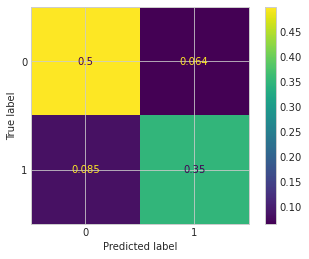

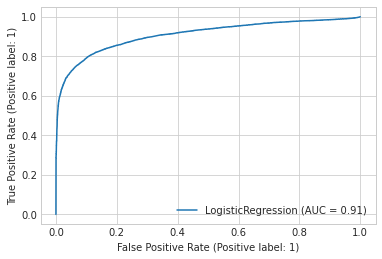

In [23]:
predict("Logistic Regression", LogisticRegression(), X_train_scaled_top10_features, X_test_scaled_top10_features, y_train, y_test, results_df_top10_features_SelectKBest)

['Linear SVC', 0.8500923929781337, 0.8437181742431257, 0.8051064581676827, 0.8239602169981917, 0.8449698218381567, 3.60866]
Plotting Confusion Matrix and ROC curve


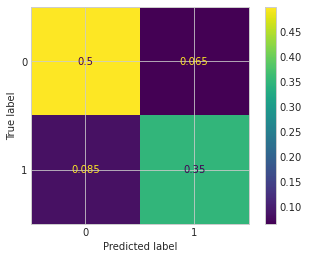

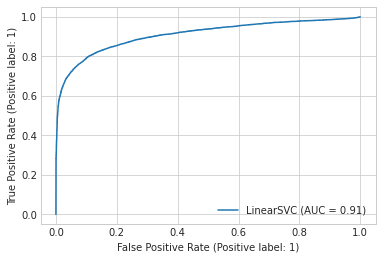

In [24]:
predict("Linear SVC", LinearSVC(), X_train_scaled_top10_features, X_test_scaled_top10_features, y_train, y_test, results_df_top10_features_SelectKBest)

['SGDClassifier', 0.8539421004003696, 0.9055729222809098, 0.7422033748564361, 0.8157894736842105, 0.8412183552319978, 0.38626]
Plotting Confusion Matrix and ROC curve


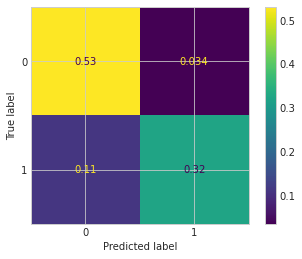

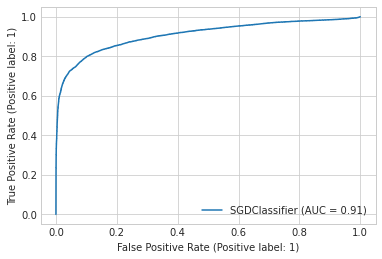

In [25]:
predict("SGDClassifier", SGDClassifier(), X_train_scaled_top10_features, X_test_scaled_top10_features, y_train, y_test, results_df_top10_features_SelectKBest)

['DecisionTreeClassifier', 0.8829688943640284, 0.8658418029164825, 0.8655358247194982, 0.8656887867809491, 0.8809837819101347, 0.44696]
Plotting Confusion Matrix and ROC curve


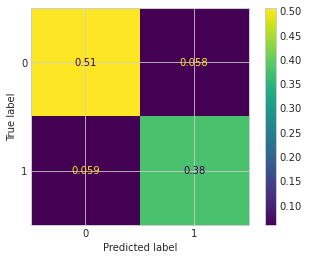

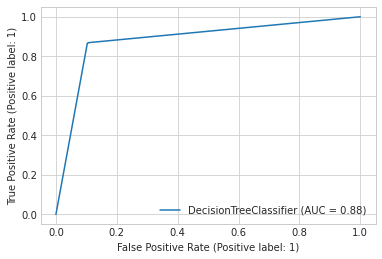

In [26]:
predict("DecisionTreeClassifier", DecisionTreeClassifier(), X_train_scaled_top10_features, X_test_scaled_top10_features, y_train, y_test, results_df_top10_features_SelectKBest)

['RandomForestClassifier', 0.9060671388974438, 0.9076301533376182, 0.8733103631062815, 0.8901395767672219, 0.9023371082775727, 11.07003]
Plotting Confusion Matrix and ROC curve


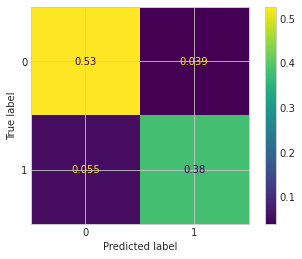

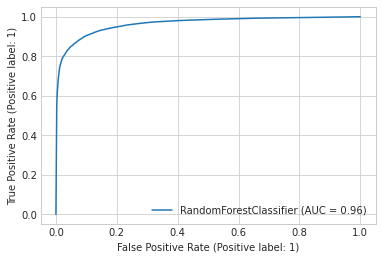

In [27]:
predict("RandomForestClassifier", RandomForestClassifier(), X_train_scaled_top10_features, X_test_scaled_top10_features, y_train, y_test, results_df_top10_features_SelectKBest)

['GradientBoostingClassifier', 0.8990991684631968, 0.9013473606496862, 0.8628854139058221, 0.8816971338298352, 0.8949754899235053, 9.61167]
Plotting Confusion Matrix and ROC curve


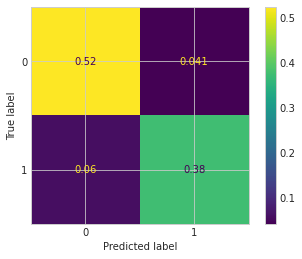

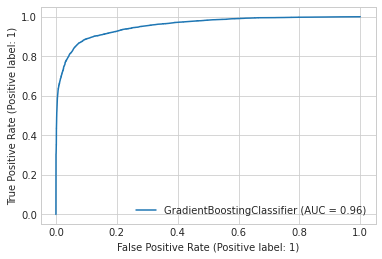

In [28]:
predict("GradientBoostingClassifier", GradientBoostingClassifier(), X_train_scaled_top10_features, X_test_scaled_top10_features, y_train, y_test, results_df_top10_features_SelectKBest)

[09:21:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
['XGBClassifier', 0.914882968894364, 0.9212765957446809, 0.8798480431133492, 0.9000858601834696, 0.910893524183406, 27.31163]
Plotting Confusion Matrix and ROC curve


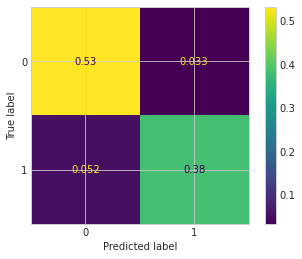

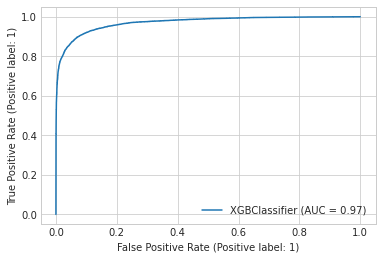

In [29]:
predict("XGBClassifier", XGBClassifier(), X_train_scaled_top10_features, X_test_scaled_top10_features, y_train, y_test, results_df_top10_features_SelectKBest)

[09:22:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
['XGBRFClassifier', 0.8995996304280874, 0.9017618300894752, 0.8636805371499249, 0.8823104693140795, 0.8955095051172289, 25.0265]
Plotting Confusion Matrix and ROC curve


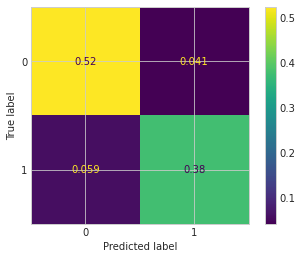

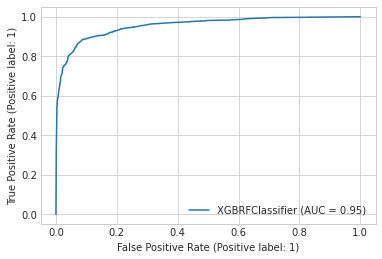

In [30]:
predict("XGBRFClassifier", XGBRFClassifier(), X_train_scaled_top10_features, X_test_scaled_top10_features, y_train, y_test, results_df_top10_features_SelectKBest)

['AdaBoostClassifier', 0.8716892516168772, 0.8543663471778488, 0.8505168301086669, 0.8524372426617081, 0.8692783372757976, 3.15615]
Plotting Confusion Matrix and ROC curve


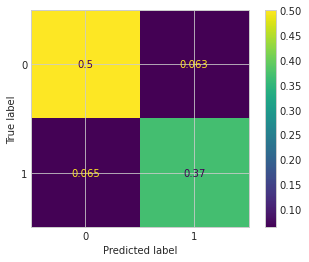

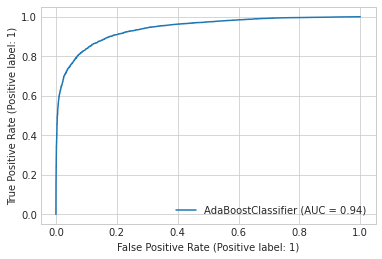

In [31]:
predict("AdaBoostClassifier", AdaBoostClassifier(), X_train_scaled_top10_features, X_test_scaled_top10_features, y_train, y_test, results_df_top10_features_SelectKBest)

Learning rate set to 0.074823
0:	learn: 0.6131115	total: 76.1ms	remaining: 1m 15s
1:	learn: 0.5528278	total: 101ms	remaining: 50.2s
2:	learn: 0.5041263	total: 127ms	remaining: 42.1s
3:	learn: 0.4654916	total: 151ms	remaining: 37.7s
4:	learn: 0.4341823	total: 177ms	remaining: 35.3s
5:	learn: 0.4096849	total: 206ms	remaining: 34.1s
6:	learn: 0.3902241	total: 233ms	remaining: 33.1s
7:	learn: 0.3736130	total: 276ms	remaining: 34.2s
8:	learn: 0.3591078	total: 307ms	remaining: 33.8s
9:	learn: 0.3472129	total: 335ms	remaining: 33.1s
10:	learn: 0.3381387	total: 368ms	remaining: 33.1s
11:	learn: 0.3283592	total: 398ms	remaining: 32.8s
12:	learn: 0.3208579	total: 425ms	remaining: 32.2s
13:	learn: 0.3153190	total: 454ms	remaining: 32s
14:	learn: 0.3077545	total: 482ms	remaining: 31.7s
15:	learn: 0.3020691	total: 509ms	remaining: 31.3s
16:	learn: 0.2971765	total: 542ms	remaining: 31.3s
17:	learn: 0.2895927	total: 570ms	remaining: 31.1s
18:	learn: 0.2862046	total: 597ms	remaining: 30.8s
19:	learn: 

165:	learn: 0.2129993	total: 4.67s	remaining: 23.5s
166:	learn: 0.2129489	total: 4.7s	remaining: 23.4s
167:	learn: 0.2129107	total: 4.72s	remaining: 23.4s
168:	learn: 0.2127526	total: 4.76s	remaining: 23.4s
169:	learn: 0.2127088	total: 4.78s	remaining: 23.4s
170:	learn: 0.2126488	total: 4.81s	remaining: 23.3s
171:	learn: 0.2125420	total: 4.84s	remaining: 23.3s
172:	learn: 0.2124438	total: 4.86s	remaining: 23.2s
173:	learn: 0.2123091	total: 4.89s	remaining: 23.2s
174:	learn: 0.2122362	total: 4.92s	remaining: 23.2s
175:	learn: 0.2121663	total: 4.94s	remaining: 23.1s
176:	learn: 0.2120921	total: 4.97s	remaining: 23.1s
177:	learn: 0.2120390	total: 4.99s	remaining: 23.1s
178:	learn: 0.2119077	total: 5.02s	remaining: 23s
179:	learn: 0.2117961	total: 5.04s	remaining: 23s
180:	learn: 0.2116591	total: 5.07s	remaining: 22.9s
181:	learn: 0.2115680	total: 5.09s	remaining: 22.9s
182:	learn: 0.2115044	total: 5.12s	remaining: 22.9s
183:	learn: 0.2114388	total: 5.15s	remaining: 22.8s
184:	learn: 0.211

330:	learn: 0.2010911	total: 9.15s	remaining: 18.5s
331:	learn: 0.2010645	total: 9.18s	remaining: 18.5s
332:	learn: 0.2010206	total: 9.21s	remaining: 18.4s
333:	learn: 0.2009938	total: 9.24s	remaining: 18.4s
334:	learn: 0.2009204	total: 9.27s	remaining: 18.4s
335:	learn: 0.2008704	total: 9.3s	remaining: 18.4s
336:	learn: 0.2008345	total: 9.32s	remaining: 18.3s
337:	learn: 0.2008076	total: 9.35s	remaining: 18.3s
338:	learn: 0.2007817	total: 9.38s	remaining: 18.3s
339:	learn: 0.2007216	total: 9.4s	remaining: 18.3s
340:	learn: 0.2006982	total: 9.43s	remaining: 18.2s
341:	learn: 0.2006489	total: 9.46s	remaining: 18.2s
342:	learn: 0.2006297	total: 9.49s	remaining: 18.2s
343:	learn: 0.2005897	total: 9.52s	remaining: 18.2s
344:	learn: 0.2005449	total: 9.55s	remaining: 18.1s
345:	learn: 0.2005003	total: 9.57s	remaining: 18.1s
346:	learn: 0.2004584	total: 9.6s	remaining: 18.1s
347:	learn: 0.2004147	total: 9.63s	remaining: 18s
348:	learn: 0.2003665	total: 9.65s	remaining: 18s
349:	learn: 0.20027

492:	learn: 0.1949126	total: 13.7s	remaining: 14s
493:	learn: 0.1948746	total: 13.7s	remaining: 14s
494:	learn: 0.1948609	total: 13.7s	remaining: 14s
495:	learn: 0.1948234	total: 13.7s	remaining: 14s
496:	learn: 0.1948050	total: 13.8s	remaining: 13.9s
497:	learn: 0.1947892	total: 13.8s	remaining: 13.9s
498:	learn: 0.1946941	total: 13.8s	remaining: 13.9s
499:	learn: 0.1946522	total: 13.9s	remaining: 13.9s
500:	learn: 0.1946338	total: 13.9s	remaining: 13.8s
501:	learn: 0.1946163	total: 13.9s	remaining: 13.8s
502:	learn: 0.1945957	total: 13.9s	remaining: 13.8s
503:	learn: 0.1945756	total: 14s	remaining: 13.8s
504:	learn: 0.1945392	total: 14s	remaining: 13.7s
505:	learn: 0.1944824	total: 14s	remaining: 13.7s
506:	learn: 0.1944676	total: 14.1s	remaining: 13.7s
507:	learn: 0.1944400	total: 14.1s	remaining: 13.6s
508:	learn: 0.1944228	total: 14.1s	remaining: 13.6s
509:	learn: 0.1943947	total: 14.1s	remaining: 13.6s
510:	learn: 0.1943735	total: 14.2s	remaining: 13.6s
511:	learn: 0.1943573	tota

651:	learn: 0.1903848	total: 18s	remaining: 9.59s
652:	learn: 0.1903615	total: 18s	remaining: 9.56s
653:	learn: 0.1903506	total: 18s	remaining: 9.53s
654:	learn: 0.1903140	total: 18s	remaining: 9.51s
655:	learn: 0.1902789	total: 18.1s	remaining: 9.48s
656:	learn: 0.1902391	total: 18.1s	remaining: 9.45s
657:	learn: 0.1901944	total: 18.1s	remaining: 9.42s
658:	learn: 0.1901794	total: 18.2s	remaining: 9.39s
659:	learn: 0.1901631	total: 18.2s	remaining: 9.37s
660:	learn: 0.1901341	total: 18.2s	remaining: 9.34s
661:	learn: 0.1901219	total: 18.2s	remaining: 9.31s
662:	learn: 0.1901105	total: 18.3s	remaining: 9.28s
663:	learn: 0.1900646	total: 18.3s	remaining: 9.25s
664:	learn: 0.1900336	total: 18.3s	remaining: 9.22s
665:	learn: 0.1900176	total: 18.3s	remaining: 9.2s
666:	learn: 0.1900060	total: 18.4s	remaining: 9.17s
667:	learn: 0.1899854	total: 18.4s	remaining: 9.14s
668:	learn: 0.1899568	total: 18.4s	remaining: 9.11s
669:	learn: 0.1899449	total: 18.4s	remaining: 9.08s
670:	learn: 0.1899282

811:	learn: 0.1864180	total: 22.2s	remaining: 5.14s
812:	learn: 0.1864008	total: 22.2s	remaining: 5.11s
813:	learn: 0.1863903	total: 22.2s	remaining: 5.08s
814:	learn: 0.1863625	total: 22.3s	remaining: 5.05s
815:	learn: 0.1863098	total: 22.3s	remaining: 5.03s
816:	learn: 0.1862938	total: 22.3s	remaining: 5s
817:	learn: 0.1862685	total: 22.4s	remaining: 4.97s
818:	learn: 0.1862478	total: 22.4s	remaining: 4.95s
819:	learn: 0.1862269	total: 22.4s	remaining: 4.92s
820:	learn: 0.1861967	total: 22.4s	remaining: 4.89s
821:	learn: 0.1861774	total: 22.5s	remaining: 4.86s
822:	learn: 0.1861509	total: 22.5s	remaining: 4.84s
823:	learn: 0.1861389	total: 22.5s	remaining: 4.81s
824:	learn: 0.1861086	total: 22.5s	remaining: 4.78s
825:	learn: 0.1860951	total: 22.6s	remaining: 4.75s
826:	learn: 0.1860799	total: 22.6s	remaining: 4.73s
827:	learn: 0.1860717	total: 22.6s	remaining: 4.7s
828:	learn: 0.1860507	total: 22.6s	remaining: 4.67s
829:	learn: 0.1860241	total: 22.7s	remaining: 4.64s
830:	learn: 0.18

972:	learn: 0.1828982	total: 27.4s	remaining: 759ms
973:	learn: 0.1828766	total: 27.4s	remaining: 731ms
974:	learn: 0.1828457	total: 27.4s	remaining: 703ms
975:	learn: 0.1828262	total: 27.4s	remaining: 675ms
976:	learn: 0.1827989	total: 27.5s	remaining: 647ms
977:	learn: 0.1827756	total: 27.5s	remaining: 618ms
978:	learn: 0.1827627	total: 27.5s	remaining: 590ms
979:	learn: 0.1827398	total: 27.5s	remaining: 562ms
980:	learn: 0.1827241	total: 27.6s	remaining: 534ms
981:	learn: 0.1827164	total: 27.6s	remaining: 506ms
982:	learn: 0.1826896	total: 27.6s	remaining: 478ms
983:	learn: 0.1826528	total: 27.6s	remaining: 450ms
984:	learn: 0.1826271	total: 27.7s	remaining: 421ms
985:	learn: 0.1825988	total: 27.7s	remaining: 393ms
986:	learn: 0.1825713	total: 27.7s	remaining: 365ms
987:	learn: 0.1825627	total: 27.8s	remaining: 337ms
988:	learn: 0.1825283	total: 27.8s	remaining: 309ms
989:	learn: 0.1825080	total: 27.9s	remaining: 281ms
990:	learn: 0.1824827	total: 27.9s	remaining: 253ms
991:	learn: 

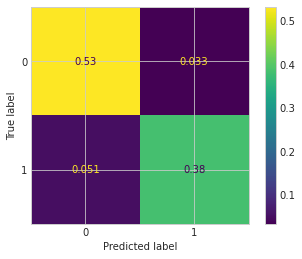

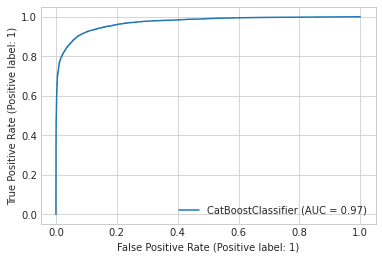

In [32]:
predict("CatBoostClassifier", CatBoostClassifier(), X_train_scaled_top10_features, X_test_scaled_top10_features, y_train, y_test, results_df_top10_features_SelectKBest)

In [33]:
# Sort and ignore index
results_df_top10_features_SelectKBest = results_df_top10_features_SelectKBest.sort_values('ROC-AUC score', ascending=False, ignore_index=True)
results_df_top10_features_SelectKBest.head(20)

,Algorithm,Accuracy,Precision,Recall,F1 Score,ROC-AUC score,Execution Time (sec)
0,CatBoostClassifier,0.916346,0.922019,0.882675,0.901918,0.912512,28.63186
1,XGBClassifier,0.914883,0.921277,0.879848,0.900086,0.910894,27.31163
2,RandomForestClassifier,0.906067,0.907630,0.873310,0.890140,0.902337,11.07003
3,XGBRFClassifier,0.899600,0.901762,0.863681,0.882310,0.895510,25.02650
4,GradientBoostingClassifier,0.899099,0.901347,0.862885,0.881697,0.894975,9.61167
5,DecisionTreeClassifier,0.882969,0.865842,0.865536,0.865689,0.880984,0.44696
6,AdaBoostClassifier,0.871689,0.854366,0.850517,0.852437,0.869278,3.15615
7,Logistic Regression,0.851093,0.845177,0.805902,0.825072,0.845947,5.71607
8,Linear SVC,0.850092,0.843718,0.805106,0.823960,0.844970,3.60866
9,SGDClassifier,0.853942,0.905573,0.742203,0.815789,0.841218,0.38626


def predict(classifier_name, classifier, X, y, result_df):
    start_time = time()
    cv = RepeatedStratifiedKFold(n_splits = 3, random_state = 40)
    acc_score = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    print(f'{classifier_name} Accuracy: {acc_score}')
    prec_score = cross_val_score(classifier, X, y, scoring='precision', cv=cv, n_jobs=-1)
    print(f'{classifier_name} Precision: {prec_score}')
    recall_score = cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
    print(f'{classifier_name} Recall: {recall_score}')
    f1_score = cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
    print(f'{classifier_name} F1: {f1_score}')
    roc_score = cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    print(f'{classifier_name} ROC_AUC score: {roc_score}')
    exec_time = np.round(time()-start_time,5)
    
    result = [classifier_name, acc_score.mean(), prec_score.mean(), recall_score.mean(), f1_score.mean(), roc_score.mean(), exec_time]
    print(result)
    result_df.loc[len(result_df)] = result

def run_all_models(X, y, results_df):
    results_df = pd.DataFrame(columns = ['Algorithm', 'Accuracy', 'Precision','Recall', 'F1 Score', 'ROC-AUC score', 'Execution Time (sec)'])
    predict("Logistic Regression", LogisticRegression(), X, y, results_df)
    predict("Linear SVC", LinearSVC(), X, y, results_df)
    predict("SGDClassifier", SGDClassifier(), X, y, results_df)
    predict("DecisionTreeClassifier", DecisionTreeClassifier(), X, y, results_df)
    predict("RandomForestClassifier", RandomForestClassifier(),  X, y, results_df)
    predict("GradientBoostingClassifier", GradientBoostingClassifier(),  X, y, results_df)
    predict("XGBClassifier", DecisionTreeClassifier(),  X, y, results_df)
    predict("XGBRFClassifier", XGBRFClassifier(), X, y, results_df)
    predict("AdaBoostClassifier", AdaBoostClassifier(), X, y, results_df)
    predict("CatBoostClassifier", CatBoostClassifier(), X, y, results_df)
    
    results_df = results_df.sort_values('ROC-AUC score', ascending=False, ignore_index=True)
    results_df.head()
        

run_all_models(X_scaled_top10_features, y, results_df_top10_features_SelectKBest)

### 2. Prediction using top 15 Features

In [34]:
#Creating a Result Dataframe 
results_df_top15_features_SelectKBest = pd.DataFrame(columns = ['Algorithm', 'Accuracy', 'Precision','Recall', 'F1 Score', 'ROC-AUC score', 'Execution Time (sec)'])
results_df_top15_features_SelectKBest

,Algorithm,Accuracy,Precision,Recall,F1 Score,ROC-AUC score,Execution Time (sec)


In [35]:
X_train_scaled_top15_features = X_train_scaled[['Customer Type', 'Type of Travel', 'Class', 'Flight Distance',
       'Ease of Online booking', 'Food and drink', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Inflight service', 'Cleanliness']]
X_test_scaled_top15_features = X_test_scaled[['Customer Type', 'Type of Travel', 'Class', 'Flight Distance',
       'Ease of Online booking', 'Food and drink', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Inflight service', 'Cleanliness']]

['Logistic Regression', 0.8660686787804127, 0.8647868974502141, 0.8210089230497394, 0.8423294810786314, 0.860937701614929, 6.58982]
Plotting Confusion Matrix and ROC curve


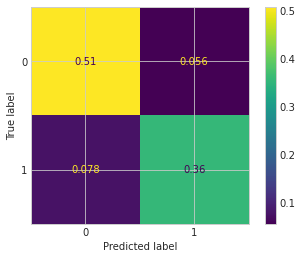

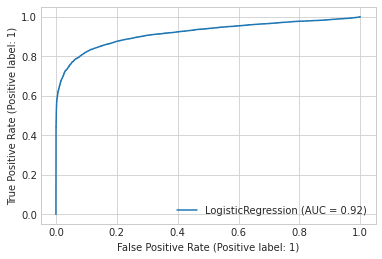

In [36]:
predict("Logistic Regression", LogisticRegression(), X_train_scaled_top15_features, X_test_scaled_top15_features, y_train, y_test, results_df_top15_features_SelectKBest)

['Linear SVC', 0.865568216815522, 0.8674302882358464, 0.8162381835851223, 0.8410559854346836, 0.8599509809922611, 5.95948]
Plotting Confusion Matrix and ROC curve


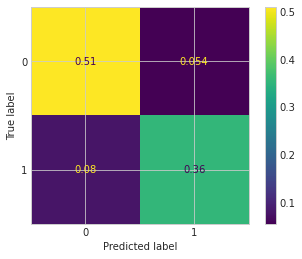

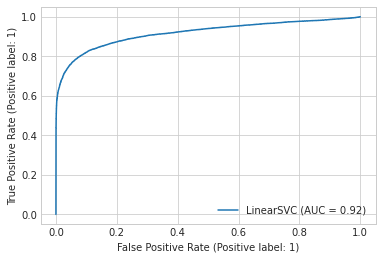

In [37]:
predict("Linear SVC", LinearSVC(), X_train_scaled_top15_features, X_test_scaled_top15_features, y_train, y_test, results_df_top15_features_SelectKBest)

['SGDClassifier', 0.8699953803510934, 0.9049561492963492, 0.7839915186853962, 0.8401420118343196, 0.8602020771430666, 0.45866]
Plotting Confusion Matrix and ROC curve


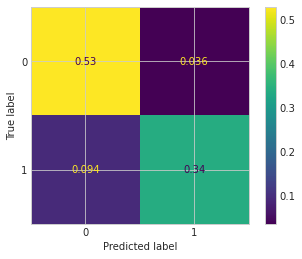

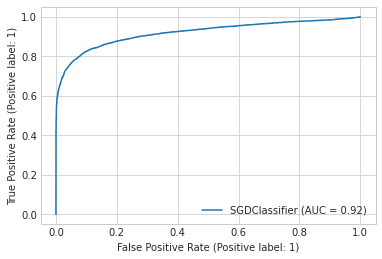

In [38]:
predict("SGDClassifier", SGDClassifier(), X_train_scaled_top15_features, X_test_scaled_top15_features, y_train, y_test, results_df_top15_features_SelectKBest)

['DecisionTreeClassifier', 0.9132660917770249, 0.899031690140845, 0.9022881880024737, 0.9006569954583535, 0.9120160323242223, 0.58632]
Plotting Confusion Matrix and ROC curve


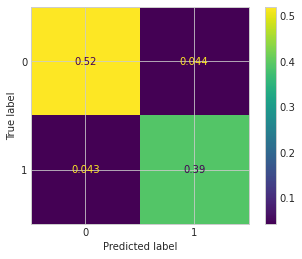

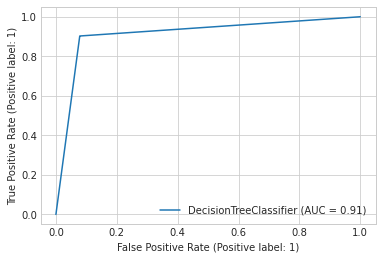

In [39]:
predict("DecisionTreeClassifier", DecisionTreeClassifier(), X_train_scaled_top15_features, X_test_scaled_top15_features, y_train, y_test, results_df_top15_features_SelectKBest)

['RandomForestClassifier', 0.936210348013551, 0.9423182567295367, 0.9092676031451542, 0.9254979542286768, 0.9331423640341995, 10.46254]
Plotting Confusion Matrix and ROC curve


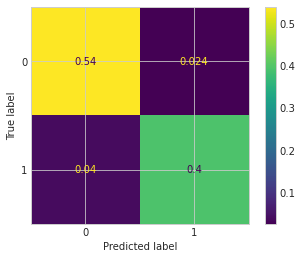

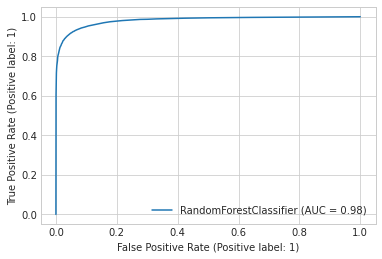

In [40]:
predict("RandomForestClassifier", RandomForestClassifier(), X_train_scaled_top15_features, X_test_scaled_top15_features, y_train, y_test, results_df_top15_features_SelectKBest)

['GradientBoostingClassifier', 0.9215044656606098, 0.9226635088358536, 0.8948670377241806, 0.9085527200968742, 0.9184712482746578, 12.46703]
Plotting Confusion Matrix and ROC curve


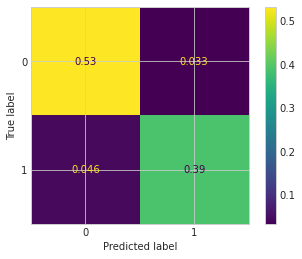

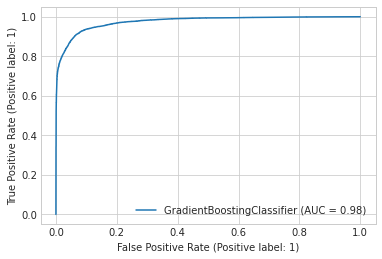

In [41]:
predict("GradientBoostingClassifier", GradientBoostingClassifier(), X_train_scaled_top15_features, X_test_scaled_top15_features, y_train, y_test, results_df_top15_features_SelectKBest)

[09:23:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
['XGBClassifier', 0.9387126578380043, 0.9458245485379044, 0.9115646258503401, 0.9283786215583947, 0.9356212977105969, 100.74441]
Plotting Confusion Matrix and ROC curve


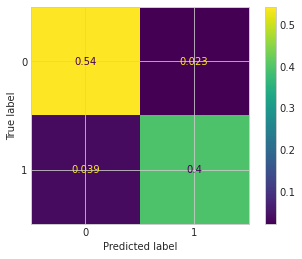

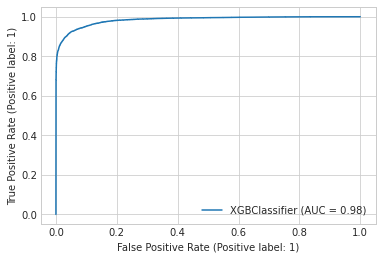

In [42]:
predict("XGBClassifier", XGBClassifier(), X_train_scaled_top15_features, X_test_scaled_top15_features, y_train, y_test, results_df_top15_features_SelectKBest)

[09:29:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
['XGBRFClassifier', 0.9114182322143517, 0.9057775377969762, 0.8892128279883382, 0.8974187508358967, 0.9088896916089606, 240.91798]
Plotting Confusion Matrix and ROC curve


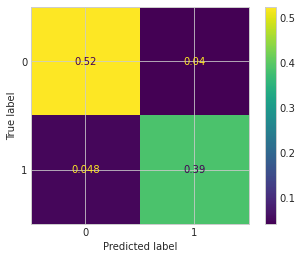

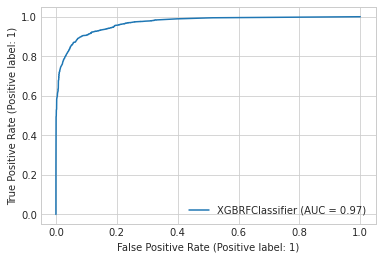

In [43]:
predict("XGBRFClassifier", XGBRFClassifier(), X_train_scaled_top15_features, X_test_scaled_top15_features, y_train, y_test, results_df_top15_features_SelectKBest)

['AdaBoostClassifier', 0.8926701570680629, 0.8789871168369614, 0.8740171393232617, 0.8764950828386641, 0.8905461285072336, 3.66691]
Plotting Confusion Matrix and ROC curve


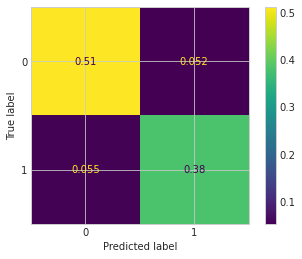

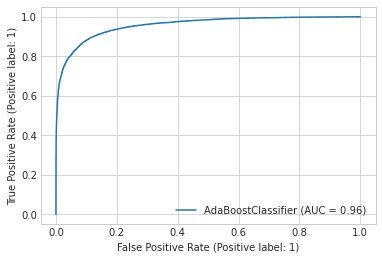

In [44]:
predict("AdaBoostClassifier", AdaBoostClassifier(), X_train_scaled_top15_features, X_test_scaled_top15_features, y_train, y_test, results_df_top15_features_SelectKBest)

Learning rate set to 0.074823
0:	learn: 0.6109037	total: 27.7ms	remaining: 27.7s
1:	learn: 0.5379794	total: 55.3ms	remaining: 27.6s
2:	learn: 0.4865359	total: 82.4ms	remaining: 27.4s
3:	learn: 0.4430497	total: 111ms	remaining: 27.5s
4:	learn: 0.4103751	total: 138ms	remaining: 27.6s
5:	learn: 0.3833918	total: 169ms	remaining: 27.9s
6:	learn: 0.3596196	total: 200ms	remaining: 28.4s
7:	learn: 0.3436223	total: 233ms	remaining: 28.9s
8:	learn: 0.3288722	total: 261ms	remaining: 28.8s
9:	learn: 0.3184147	total: 289ms	remaining: 28.6s
10:	learn: 0.3045059	total: 318ms	remaining: 28.6s
11:	learn: 0.2873026	total: 345ms	remaining: 28.4s
12:	learn: 0.2813965	total: 375ms	remaining: 28.5s
13:	learn: 0.2740930	total: 418ms	remaining: 29.4s
14:	learn: 0.2660730	total: 450ms	remaining: 29.6s
15:	learn: 0.2568645	total: 478ms	remaining: 29.4s
16:	learn: 0.2526844	total: 507ms	remaining: 29.3s
17:	learn: 0.2460268	total: 541ms	remaining: 29.5s
18:	learn: 0.2425467	total: 581ms	remaining: 30s
19:	learn:

162:	learn: 0.1555721	total: 5.36s	remaining: 27.5s
163:	learn: 0.1554948	total: 5.4s	remaining: 27.5s
164:	learn: 0.1553472	total: 5.43s	remaining: 27.5s
165:	learn: 0.1552075	total: 5.46s	remaining: 27.4s
166:	learn: 0.1550731	total: 5.48s	remaining: 27.4s
167:	learn: 0.1549917	total: 5.51s	remaining: 27.3s
168:	learn: 0.1549022	total: 5.54s	remaining: 27.3s
169:	learn: 0.1547549	total: 5.57s	remaining: 27.2s
170:	learn: 0.1546545	total: 5.6s	remaining: 27.1s
171:	learn: 0.1545682	total: 5.63s	remaining: 27.1s
172:	learn: 0.1544776	total: 5.66s	remaining: 27.1s
173:	learn: 0.1543900	total: 5.7s	remaining: 27.1s
174:	learn: 0.1543096	total: 5.73s	remaining: 27s
175:	learn: 0.1542479	total: 5.75s	remaining: 26.9s
176:	learn: 0.1541254	total: 5.78s	remaining: 26.9s
177:	learn: 0.1539931	total: 5.81s	remaining: 26.8s
178:	learn: 0.1538481	total: 5.84s	remaining: 26.8s
179:	learn: 0.1537130	total: 5.87s	remaining: 26.7s
180:	learn: 0.1536449	total: 5.89s	remaining: 26.7s
181:	learn: 0.153

327:	learn: 0.1423414	total: 10.3s	remaining: 21.2s
328:	learn: 0.1422751	total: 10.4s	remaining: 21.1s
329:	learn: 0.1422306	total: 10.4s	remaining: 21.1s
330:	learn: 0.1421719	total: 10.4s	remaining: 21.1s
331:	learn: 0.1421195	total: 10.5s	remaining: 21.1s
332:	learn: 0.1420695	total: 10.5s	remaining: 21s
333:	learn: 0.1420031	total: 10.5s	remaining: 21s
334:	learn: 0.1419699	total: 10.6s	remaining: 20.9s
335:	learn: 0.1418774	total: 10.6s	remaining: 20.9s
336:	learn: 0.1418368	total: 10.6s	remaining: 20.9s
337:	learn: 0.1417964	total: 10.6s	remaining: 20.8s
338:	learn: 0.1417577	total: 10.7s	remaining: 20.8s
339:	learn: 0.1417150	total: 10.7s	remaining: 20.8s
340:	learn: 0.1416772	total: 10.7s	remaining: 20.7s
341:	learn: 0.1416078	total: 10.8s	remaining: 20.7s
342:	learn: 0.1415706	total: 10.8s	remaining: 20.7s
343:	learn: 0.1415392	total: 10.8s	remaining: 20.6s
344:	learn: 0.1414824	total: 10.9s	remaining: 20.6s
345:	learn: 0.1414141	total: 10.9s	remaining: 20.6s
346:	learn: 0.14

490:	learn: 0.1352271	total: 15.2s	remaining: 15.7s
491:	learn: 0.1351862	total: 15.2s	remaining: 15.7s
492:	learn: 0.1351589	total: 15.2s	remaining: 15.7s
493:	learn: 0.1351313	total: 15.3s	remaining: 15.6s
494:	learn: 0.1350927	total: 15.3s	remaining: 15.6s
495:	learn: 0.1350757	total: 15.3s	remaining: 15.6s
496:	learn: 0.1350542	total: 15.3s	remaining: 15.5s
497:	learn: 0.1350197	total: 15.4s	remaining: 15.5s
498:	learn: 0.1349831	total: 15.4s	remaining: 15.5s
499:	learn: 0.1349441	total: 15.4s	remaining: 15.4s
500:	learn: 0.1349172	total: 15.5s	remaining: 15.4s
501:	learn: 0.1348847	total: 15.5s	remaining: 15.4s
502:	learn: 0.1348361	total: 15.5s	remaining: 15.3s
503:	learn: 0.1348098	total: 15.6s	remaining: 15.3s
504:	learn: 0.1347946	total: 15.6s	remaining: 15.3s
505:	learn: 0.1347630	total: 15.6s	remaining: 15.2s
506:	learn: 0.1347437	total: 15.6s	remaining: 15.2s
507:	learn: 0.1347178	total: 15.7s	remaining: 15.2s
508:	learn: 0.1346940	total: 15.7s	remaining: 15.1s
509:	learn: 

655:	learn: 0.1298762	total: 20.1s	remaining: 10.5s
656:	learn: 0.1298532	total: 20.1s	remaining: 10.5s
657:	learn: 0.1298271	total: 20.2s	remaining: 10.5s
658:	learn: 0.1298066	total: 20.2s	remaining: 10.5s
659:	learn: 0.1297750	total: 20.2s	remaining: 10.4s
660:	learn: 0.1297361	total: 20.3s	remaining: 10.4s
661:	learn: 0.1297127	total: 20.3s	remaining: 10.4s
662:	learn: 0.1296889	total: 20.3s	remaining: 10.3s
663:	learn: 0.1296487	total: 20.4s	remaining: 10.3s
664:	learn: 0.1295997	total: 20.4s	remaining: 10.3s
665:	learn: 0.1295830	total: 20.4s	remaining: 10.2s
666:	learn: 0.1295577	total: 20.4s	remaining: 10.2s
667:	learn: 0.1295256	total: 20.5s	remaining: 10.2s
668:	learn: 0.1295035	total: 20.5s	remaining: 10.1s
669:	learn: 0.1294841	total: 20.5s	remaining: 10.1s
670:	learn: 0.1294612	total: 20.6s	remaining: 10.1s
671:	learn: 0.1294501	total: 20.6s	remaining: 10s
672:	learn: 0.1294194	total: 20.6s	remaining: 10s
673:	learn: 0.1293893	total: 20.6s	remaining: 9.99s
674:	learn: 0.12

820:	learn: 0.1254640	total: 25s	remaining: 5.45s
821:	learn: 0.1254517	total: 25s	remaining: 5.42s
822:	learn: 0.1254219	total: 25s	remaining: 5.38s
823:	learn: 0.1253963	total: 25.1s	remaining: 5.35s
824:	learn: 0.1253768	total: 25.1s	remaining: 5.32s
825:	learn: 0.1253323	total: 25.1s	remaining: 5.29s
826:	learn: 0.1253138	total: 25.2s	remaining: 5.26s
827:	learn: 0.1252906	total: 25.2s	remaining: 5.23s
828:	learn: 0.1252579	total: 25.2s	remaining: 5.2s
829:	learn: 0.1252342	total: 25.2s	remaining: 5.17s
830:	learn: 0.1252016	total: 25.3s	remaining: 5.14s
831:	learn: 0.1251826	total: 25.3s	remaining: 5.11s
832:	learn: 0.1251680	total: 25.3s	remaining: 5.08s
833:	learn: 0.1251542	total: 25.3s	remaining: 5.04s
834:	learn: 0.1251363	total: 25.4s	remaining: 5.01s
835:	learn: 0.1250927	total: 25.4s	remaining: 4.98s
836:	learn: 0.1250727	total: 25.4s	remaining: 4.95s
837:	learn: 0.1250586	total: 25.5s	remaining: 4.92s
838:	learn: 0.1250456	total: 25.5s	remaining: 4.89s
839:	learn: 0.12503

979:	learn: 0.1213854	total: 29.8s	remaining: 609ms
980:	learn: 0.1213513	total: 29.9s	remaining: 578ms
981:	learn: 0.1213338	total: 29.9s	remaining: 548ms
982:	learn: 0.1213253	total: 29.9s	remaining: 517ms
983:	learn: 0.1213031	total: 29.9s	remaining: 487ms
984:	learn: 0.1212796	total: 30s	remaining: 456ms
985:	learn: 0.1212579	total: 30s	remaining: 426ms
986:	learn: 0.1212463	total: 30s	remaining: 396ms
987:	learn: 0.1212320	total: 30.1s	remaining: 365ms
988:	learn: 0.1211944	total: 30.1s	remaining: 335ms
989:	learn: 0.1211688	total: 30.1s	remaining: 304ms
990:	learn: 0.1211462	total: 30.1s	remaining: 274ms
991:	learn: 0.1211205	total: 30.2s	remaining: 243ms
992:	learn: 0.1211029	total: 30.2s	remaining: 213ms
993:	learn: 0.1210796	total: 30.2s	remaining: 183ms
994:	learn: 0.1210576	total: 30.3s	remaining: 152ms
995:	learn: 0.1210317	total: 30.3s	remaining: 122ms
996:	learn: 0.1210098	total: 30.3s	remaining: 91.2ms
997:	learn: 0.1209901	total: 30.3s	remaining: 60.8ms
998:	learn: 0.12

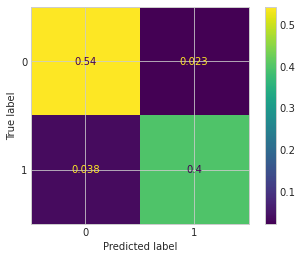

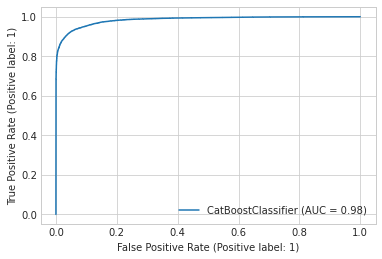

In [45]:
predict("CatBoostClassifier", CatBoostClassifier(), X_train_scaled_top15_features, X_test_scaled_top15_features, y_train, y_test, results_df_top15_features_SelectKBest)

In [46]:
# Sort and ignore index
results_df_top15_features_SelectKBest = results_df_top15_features_SelectKBest.sort_values('ROC-AUC score', ascending=False, ignore_index=True)
results_df_top15_features_SelectKBest.head(20)

,Algorithm,Accuracy,Precision,Recall,F1 Score,ROC-AUC score,Execution Time (sec)
0,CatBoostClassifier,0.939598,0.946429,0.913067,0.929448,0.936577,30.91117
1,XGBClassifier,0.938713,0.945825,0.911565,0.928379,0.935621,100.74441
2,RandomForestClassifier,0.936210,0.942318,0.909268,0.925498,0.933142,10.46254
3,GradientBoostingClassifier,0.921504,0.922664,0.894867,0.908553,0.918471,12.46703
4,DecisionTreeClassifier,0.913266,0.899032,0.902288,0.900657,0.912016,0.58632
5,XGBRFClassifier,0.911418,0.905778,0.889213,0.897419,0.908890,240.91798
6,AdaBoostClassifier,0.892670,0.878987,0.874017,0.876495,0.890546,3.66691
7,Logistic Regression,0.866069,0.864787,0.821009,0.842329,0.860938,6.58982
8,SGDClassifier,0.869995,0.904956,0.783992,0.840142,0.860202,0.45866
9,Linear SVC,0.865568,0.867430,0.816238,0.841056,0.859951,5.95948


### 3. Prediction with All Features

In [47]:
#Creating a Result Dataframe 
results_df_all_features = pd.DataFrame(columns = ['Algorithm', 'Accuracy', 'Precision','Recall', 'F1 Score', 'ROC-AUC score', 'Execution Time (sec)'])
results_df_all_features

,Algorithm,Accuracy,Precision,Recall,F1 Score,ROC-AUC score,Execution Time (sec)


['Logistic Regression', 0.8679165383430859, 0.8684603886397608, 0.821273964131107, 0.844208327657449, 0.8626053248369256, 4.82589]
Plotting Confusion Matrix and ROC curve


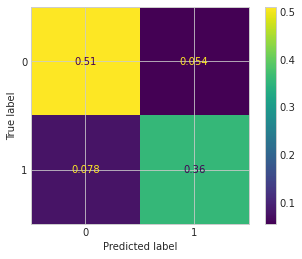

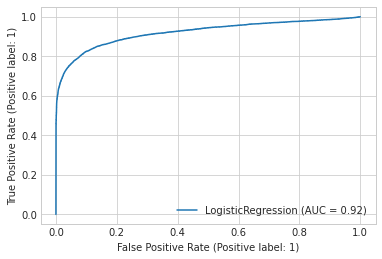

In [48]:
predict("Logistic Regression", LogisticRegression(), X_train_scaled, X_test_scaled, y_train, y_test, results_df_all_features)

['Linear SVC', 0.8671080997844164, 0.8710499009527403, 0.8157964484495097, 0.8425182481751826, 0.8612652161057673, 8.13685]
Plotting Confusion Matrix and ROC curve


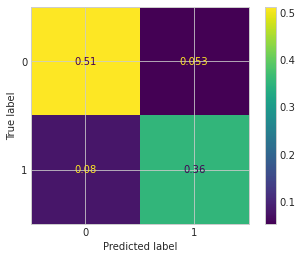

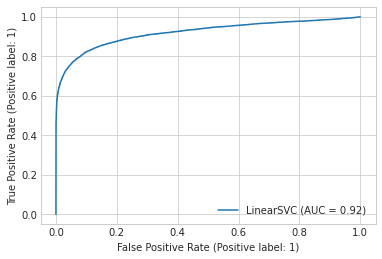

In [49]:
predict("Linear SVC", LinearSVC(), X_train_scaled, X_test_scaled, y_train, y_test, results_df_all_features)

['SGDClassifier', 0.8673775793039729, 0.8811967467079783, 0.8040462938422122, 0.8408555458031136, 0.8601660138106468, 0.51236]
Plotting Confusion Matrix and ROC curve


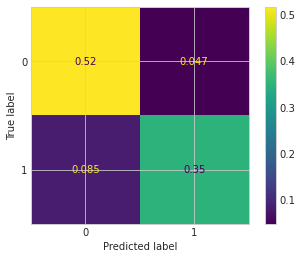

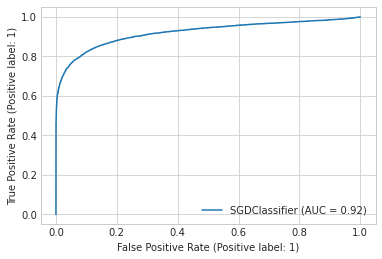

In [50]:
# SGDClassifier can optimize the same cost function as LinearSVC by adjusting the penalty and loss parameters. 
#In addition it requires less memory, allows incremental (online) learning, and implements various loss functions and regularization regimes.
predict("SGDClassifier", SGDClassifier(), X_train_scaled, X_test_scaled, y_train, y_test, results_df_all_features)

['DecisionTreeClassifier', 0.9154604250076994, 0.9022841520416263, 0.9038784344906794, 0.9030805896372143, 0.9141415778921297, 0.81819]
Plotting Confusion Matrix and ROC curve


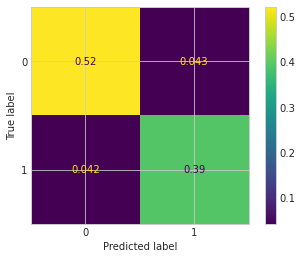

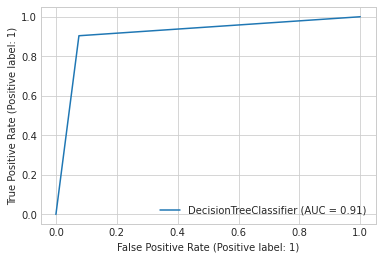

In [51]:
predict("DecisionTreeClassifier", DecisionTreeClassifier(),X_train_scaled, X_test_scaled, y_train, y_test, results_df_all_features)

['RandomForestClassifier', 0.9408684939944564, 0.9475706835026078, 0.9149218128809966, 0.9309600862998921, 0.9379139322984501, 14.60112]
Plotting Confusion Matrix and ROC curve


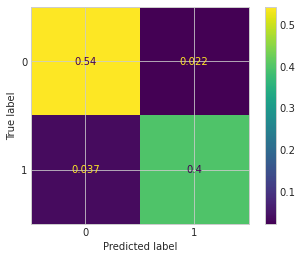

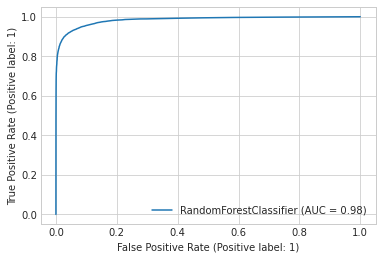

In [52]:
predict("RandomForestClassifier", RandomForestClassifier(), X_train_scaled, X_test_scaled, y_train, y_test, results_df_all_features)

['GradientBoostingClassifier', 0.9212349861410533, 0.9234633299844734, 0.8932767912359749, 0.9081192742949524, 0.9180513723526534, 17.22614]
Plotting Confusion Matrix and ROC curve


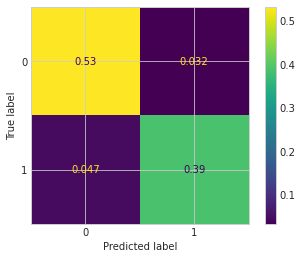

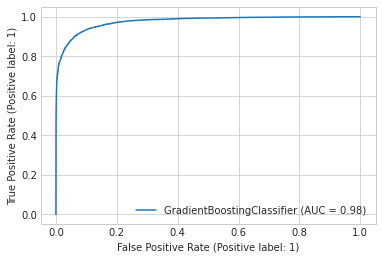

In [53]:
predict("GradientBoostingClassifier", GradientBoostingClassifier(), X_train_scaled, X_test_scaled, y_train, y_test, results_df_all_features)

[09:31:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
['XGBClassifier', 0.9417924237757931, 0.9482585245452052, 0.9164237123420796, 0.9320693683170096, 0.938903675779418, 255.89364]
Plotting Confusion Matrix and ROC curve


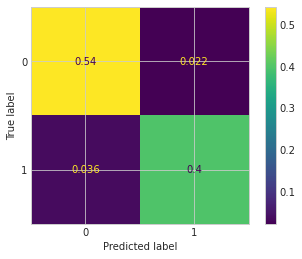

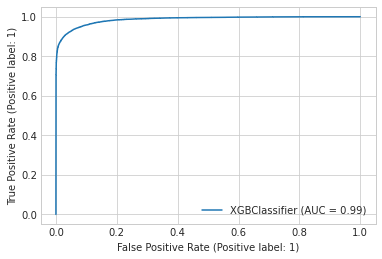

In [54]:
predict("XGBClassifier", XGBClassifier(), X_train_scaled, X_test_scaled, y_train, y_test, results_df_all_features)

[09:36:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
['XGBRFClassifier', 0.9109947643979057, 0.9058304046138596, 0.8880643166357453, 0.8968593861527481, 0.9083836627185001, 94.56185]
Plotting Confusion Matrix and ROC curve


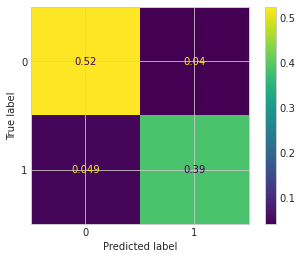

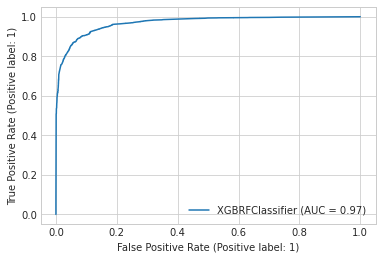

In [55]:
predict("XGBRFClassifier", XGBRFClassifier(), X_train_scaled, X_test_scaled, y_train, y_test, results_df_all_features)

['AdaBoostClassifier', 0.8954419464120726, 0.8827978997953191, 0.8764025090555703, 0.8795885795353786, 0.8932739160547006, 5.56668]
Plotting Confusion Matrix and ROC curve


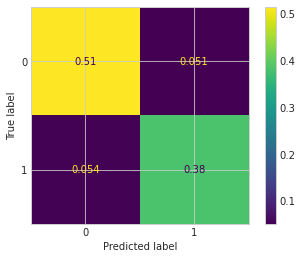

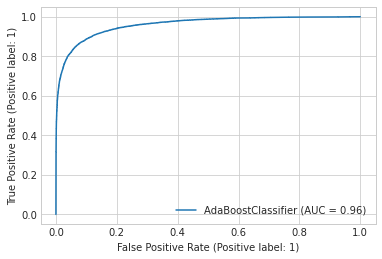

In [56]:
predict("AdaBoostClassifier", AdaBoostClassifier(), X_train_scaled, X_test_scaled, y_train, y_test, results_df_all_features)

Learning rate set to 0.074823
0:	learn: 0.6109037	total: 41.2ms	remaining: 41.1s
1:	learn: 0.5428521	total: 77.4ms	remaining: 38.6s
2:	learn: 0.4891686	total: 112ms	remaining: 37.2s
3:	learn: 0.4396674	total: 152ms	remaining: 37.7s
4:	learn: 0.4074519	total: 191ms	remaining: 38.1s
5:	learn: 0.3771544	total: 229ms	remaining: 38s
6:	learn: 0.3553155	total: 260ms	remaining: 36.9s
7:	learn: 0.3388782	total: 295ms	remaining: 36.6s
8:	learn: 0.3178849	total: 333ms	remaining: 36.7s
9:	learn: 0.3044395	total: 371ms	remaining: 36.8s
10:	learn: 0.2932890	total: 419ms	remaining: 37.6s
11:	learn: 0.2842711	total: 459ms	remaining: 37.8s
12:	learn: 0.2784654	total: 491ms	remaining: 37.3s
13:	learn: 0.2685068	total: 528ms	remaining: 37.2s
14:	learn: 0.2636906	total: 560ms	remaining: 36.8s
15:	learn: 0.2574133	total: 595ms	remaining: 36.6s
16:	learn: 0.2525847	total: 634ms	remaining: 36.7s
17:	learn: 0.2493284	total: 672ms	remaining: 36.7s
18:	learn: 0.2434563	total: 714ms	remaining: 36.9s
19:	learn: 

161:	learn: 0.1485142	total: 7.02s	remaining: 36.3s
162:	learn: 0.1483874	total: 7.07s	remaining: 36.3s
163:	learn: 0.1481562	total: 7.12s	remaining: 36.3s
164:	learn: 0.1480704	total: 7.16s	remaining: 36.2s
165:	learn: 0.1479088	total: 7.19s	remaining: 36.1s
166:	learn: 0.1478408	total: 7.22s	remaining: 36s
167:	learn: 0.1476792	total: 7.26s	remaining: 36s
168:	learn: 0.1474791	total: 7.3s	remaining: 35.9s
169:	learn: 0.1472842	total: 7.33s	remaining: 35.8s
170:	learn: 0.1471722	total: 7.37s	remaining: 35.7s
171:	learn: 0.1470170	total: 7.4s	remaining: 35.6s
172:	learn: 0.1469609	total: 7.44s	remaining: 35.6s
173:	learn: 0.1469299	total: 7.49s	remaining: 35.5s
174:	learn: 0.1467433	total: 7.53s	remaining: 35.5s
175:	learn: 0.1465773	total: 7.56s	remaining: 35.4s
176:	learn: 0.1465282	total: 7.6s	remaining: 35.4s
177:	learn: 0.1464357	total: 7.64s	remaining: 35.3s
178:	learn: 0.1463464	total: 7.68s	remaining: 35.2s
179:	learn: 0.1462764	total: 7.71s	remaining: 35.1s
180:	learn: 0.14622

325:	learn: 0.1337040	total: 12.9s	remaining: 26.7s
326:	learn: 0.1336459	total: 12.9s	remaining: 26.6s
327:	learn: 0.1335969	total: 13s	remaining: 26.6s
328:	learn: 0.1334921	total: 13s	remaining: 26.5s
329:	learn: 0.1334308	total: 13s	remaining: 26.5s
330:	learn: 0.1333877	total: 13.1s	remaining: 26.4s
331:	learn: 0.1333586	total: 13.1s	remaining: 26.4s
332:	learn: 0.1333391	total: 13.1s	remaining: 26.3s
333:	learn: 0.1332848	total: 13.2s	remaining: 26.2s
334:	learn: 0.1332289	total: 13.2s	remaining: 26.2s
335:	learn: 0.1331615	total: 13.2s	remaining: 26.1s
336:	learn: 0.1330797	total: 13.3s	remaining: 26.1s
337:	learn: 0.1330389	total: 13.3s	remaining: 26s
338:	learn: 0.1330186	total: 13.3s	remaining: 25.9s
339:	learn: 0.1329618	total: 13.3s	remaining: 25.9s
340:	learn: 0.1329219	total: 13.4s	remaining: 25.8s
341:	learn: 0.1328272	total: 13.4s	remaining: 25.8s
342:	learn: 0.1327780	total: 13.4s	remaining: 25.8s
343:	learn: 0.1327307	total: 13.5s	remaining: 25.7s
344:	learn: 0.132571

487:	learn: 0.1254744	total: 18.6s	remaining: 19.5s
488:	learn: 0.1254079	total: 18.6s	remaining: 19.4s
489:	learn: 0.1253843	total: 18.7s	remaining: 19.4s
490:	learn: 0.1253437	total: 18.7s	remaining: 19.4s
491:	learn: 0.1253181	total: 18.7s	remaining: 19.4s
492:	learn: 0.1252809	total: 18.8s	remaining: 19.3s
493:	learn: 0.1252502	total: 18.8s	remaining: 19.3s
494:	learn: 0.1252118	total: 18.9s	remaining: 19.2s
495:	learn: 0.1251828	total: 18.9s	remaining: 19.2s
496:	learn: 0.1251317	total: 18.9s	remaining: 19.2s
497:	learn: 0.1250760	total: 19s	remaining: 19.1s
498:	learn: 0.1250250	total: 19s	remaining: 19.1s
499:	learn: 0.1250122	total: 19.1s	remaining: 19.1s
500:	learn: 0.1249488	total: 19.1s	remaining: 19s
501:	learn: 0.1249081	total: 19.1s	remaining: 19s
502:	learn: 0.1248581	total: 19.2s	remaining: 18.9s
503:	learn: 0.1248259	total: 19.2s	remaining: 18.9s
504:	learn: 0.1247902	total: 19.2s	remaining: 18.9s
505:	learn: 0.1247655	total: 19.3s	remaining: 18.8s
506:	learn: 0.124720

649:	learn: 0.1197804	total: 24.4s	remaining: 13.2s
650:	learn: 0.1197479	total: 24.5s	remaining: 13.1s
651:	learn: 0.1197105	total: 24.5s	remaining: 13.1s
652:	learn: 0.1196874	total: 24.5s	remaining: 13s
653:	learn: 0.1196525	total: 24.5s	remaining: 13s
654:	learn: 0.1196031	total: 24.6s	remaining: 12.9s
655:	learn: 0.1195729	total: 24.6s	remaining: 12.9s
656:	learn: 0.1195440	total: 24.6s	remaining: 12.9s
657:	learn: 0.1195073	total: 24.7s	remaining: 12.8s
658:	learn: 0.1194842	total: 24.7s	remaining: 12.8s
659:	learn: 0.1194638	total: 24.7s	remaining: 12.7s
660:	learn: 0.1194439	total: 24.8s	remaining: 12.7s
661:	learn: 0.1194194	total: 24.8s	remaining: 12.7s
662:	learn: 0.1193896	total: 24.8s	remaining: 12.6s
663:	learn: 0.1193649	total: 24.8s	remaining: 12.6s
664:	learn: 0.1193345	total: 24.9s	remaining: 12.5s
665:	learn: 0.1193074	total: 24.9s	remaining: 12.5s
666:	learn: 0.1192552	total: 24.9s	remaining: 12.4s
667:	learn: 0.1192101	total: 25s	remaining: 12.4s
668:	learn: 0.1191

810:	learn: 0.1148340	total: 29.3s	remaining: 6.83s
811:	learn: 0.1148122	total: 29.3s	remaining: 6.79s
812:	learn: 0.1147837	total: 29.4s	remaining: 6.76s
813:	learn: 0.1147557	total: 29.4s	remaining: 6.72s
814:	learn: 0.1147462	total: 29.4s	remaining: 6.68s
815:	learn: 0.1147129	total: 29.5s	remaining: 6.65s
816:	learn: 0.1147007	total: 29.5s	remaining: 6.61s
817:	learn: 0.1146643	total: 29.6s	remaining: 6.58s
818:	learn: 0.1146419	total: 29.6s	remaining: 6.55s
819:	learn: 0.1146239	total: 29.7s	remaining: 6.51s
820:	learn: 0.1146025	total: 29.7s	remaining: 6.48s
821:	learn: 0.1145696	total: 29.8s	remaining: 6.44s
822:	learn: 0.1145396	total: 29.8s	remaining: 6.41s
823:	learn: 0.1145140	total: 29.9s	remaining: 6.38s
824:	learn: 0.1144908	total: 29.9s	remaining: 6.34s
825:	learn: 0.1143765	total: 29.9s	remaining: 6.31s
826:	learn: 0.1143451	total: 30s	remaining: 6.28s
827:	learn: 0.1143231	total: 30.1s	remaining: 6.24s
828:	learn: 0.1142977	total: 30.1s	remaining: 6.21s
829:	learn: 0.

974:	learn: 0.1106683	total: 35.5s	remaining: 911ms
975:	learn: 0.1106523	total: 35.6s	remaining: 874ms
976:	learn: 0.1106396	total: 35.6s	remaining: 838ms
977:	learn: 0.1106185	total: 35.6s	remaining: 801ms
978:	learn: 0.1106017	total: 35.7s	remaining: 765ms
979:	learn: 0.1105543	total: 35.7s	remaining: 729ms
980:	learn: 0.1105202	total: 35.7s	remaining: 692ms
981:	learn: 0.1104930	total: 35.8s	remaining: 656ms
982:	learn: 0.1104629	total: 35.8s	remaining: 619ms
983:	learn: 0.1104288	total: 35.9s	remaining: 583ms
984:	learn: 0.1104034	total: 35.9s	remaining: 547ms
985:	learn: 0.1103681	total: 35.9s	remaining: 510ms
986:	learn: 0.1103291	total: 36s	remaining: 474ms
987:	learn: 0.1102995	total: 36s	remaining: 437ms
988:	learn: 0.1102756	total: 36s	remaining: 401ms
989:	learn: 0.1102636	total: 36.1s	remaining: 364ms
990:	learn: 0.1102337	total: 36.1s	remaining: 328ms
991:	learn: 0.1102193	total: 36.1s	remaining: 291ms
992:	learn: 0.1101960	total: 36.2s	remaining: 255ms
993:	learn: 0.1101

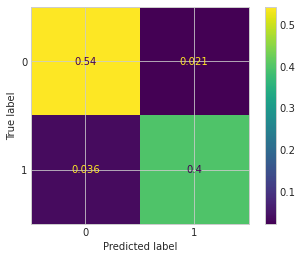

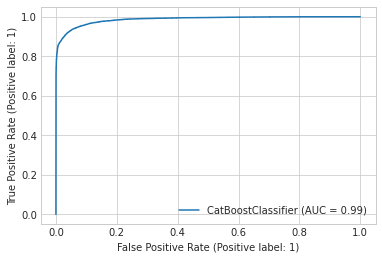

In [57]:
predict("CatBoostClassifier", CatBoostClassifier(), X_train_scaled, X_test_scaled, y_train, y_test, results_df_all_features)

In [58]:
#predict('MLPClassifier', MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1, max_iter=10000), , X_train_scaled, X_test_scaled, y_train, y_test, results_df_all_features)

In [59]:
# Obtained result from above algo - ['MLPClassifier', 0.9042962734832153, 0.8950819672131147, 0.8858195211786372, 0.8904266572637517]
#results_df_all_features.loc[len(results_df_all_features)] = ['MLPClassifier', 0.9042962734832153, 0.8950819672131147, 0.8858195211786372, 0.8904266572637517, 10000] # except time

In [60]:
#predict(KNeighborsClassifier(), "KNeighborsClassifier (K=3)")
# Kernal is not able to run on this dataset. Need to use vaex library for this.

In [61]:
# Sort and ignore index
results_df_all_features = results_df_all_features.sort_values(by=['ROC-AUC score', 'Accuracy'], ascending=False, ignore_index=True)
results_df_all_features.head(20)

,Algorithm,Accuracy,Precision,Recall,F1 Score,ROC-AUC score,Execution Time (sec)
0,CatBoostClassifier,0.943217,0.950898,0.917042,0.933663,0.940236,37.23682
1,XGBClassifier,0.941792,0.948259,0.916424,0.932069,0.938904,255.89364
2,RandomForestClassifier,0.940868,0.947571,0.914922,0.930960,0.937914,14.60112
3,GradientBoostingClassifier,0.921235,0.923463,0.893277,0.908119,0.918051,17.22614
4,DecisionTreeClassifier,0.915460,0.902284,0.903878,0.903081,0.914142,0.81819
5,XGBRFClassifier,0.910995,0.905830,0.888064,0.896859,0.908384,94.56185
6,AdaBoostClassifier,0.895442,0.882798,0.876403,0.879589,0.893274,5.56668
7,Logistic Regression,0.867917,0.868460,0.821274,0.844208,0.862605,4.82589
8,Linear SVC,0.867108,0.871050,0.815796,0.842518,0.861265,8.13685
9,SGDClassifier,0.867378,0.881197,0.804046,0.840856,0.860166,0.51236


In [62]:
# Insights: XGBoost and RFC gives the lowest mean squared error. These algorithms will be used for HyperParameter tuning.

### 4. Prediction with the Best features obtained from the Wrapper Method with the Random Forest Classifier.

In [63]:
#Creating a Result Dataframe 
results_df_best_features_Wrapper_Mtd = pd.DataFrame(columns = ['Algorithm', 'Accuracy', 'Precision','Recall', 'F1 Score', 'ROC-AUC score', 'Execution Time (sec)'])
results_df_best_features_Wrapper_Mtd

,Algorithm,Accuracy,Precision,Recall,F1 Score,ROC-AUC score,Execution Time (sec)


In [64]:
X_train_scaled_best_features = X_train_scaled[['Type of Travel', 'Class', 'Ease of Online booking', 'Online boarding', 'Seat comfort', 'Inflight entertainment']]
X_test_scaled_best_features = X_test_scaled[['Type of Travel', 'Class', 'Ease of Online booking', 'Online boarding', 'Seat comfort', 'Inflight entertainment']]

['Logistic Regression', 0.8350015398829689, 0.8132739420935412, 0.8065200106016432, 0.8098828956706884, 0.8317583337445686, 3.31862]
Plotting Confusion Matrix and ROC curve


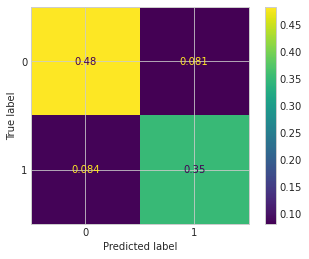

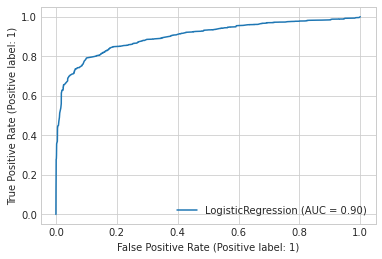

In [65]:
predict("Logistic Regression", LogisticRegression(), X_train_scaled_best_features, X_test_scaled_best_features, y_train, y_test, results_df_best_features_Wrapper_Mtd)

['Linear SVC', 0.8326917154296274, 0.8046840863409945, 0.8134994257443237, 0.8090677444864246, 0.8305062797002986, 2.52061]
Plotting Confusion Matrix and ROC curve


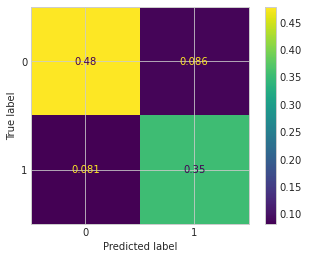

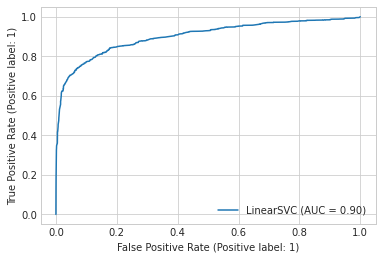

In [66]:
predict("Linear SVC", LinearSVC(),X_train_scaled_best_features, X_test_scaled_best_features, y_train, y_test, results_df_best_features_Wrapper_Mtd)

['SGDClassifier', 0.8367339082229751, 0.809677983899195, 0.8174750419648379, 0.8135578318019959, 0.8345408913856392, 0.31061]
Plotting Confusion Matrix and ROC curve


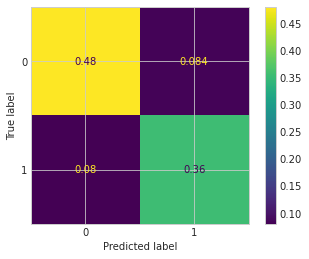

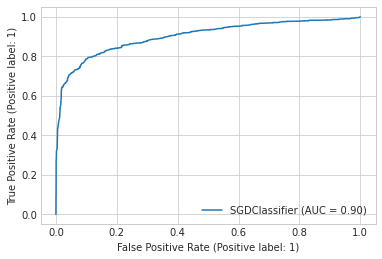

In [67]:
predict("SGDClassifier", SGDClassifier(), X_train_scaled_best_features, X_test_scaled_best_features, y_train, y_test, results_df_best_features_Wrapper_Mtd)

['DecisionTreeClassifier', 0.8984447182014167, 0.9014149634698974, 0.8611184733633713, 0.8808060726549792, 0.8941943598310341, 0.19408]
Plotting Confusion Matrix and ROC curve


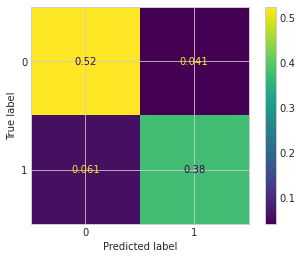

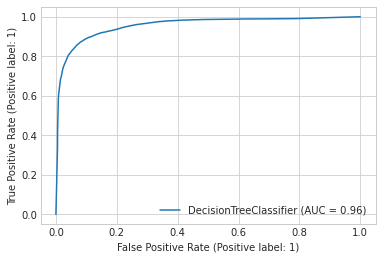

In [68]:
predict("DecisionTreeClassifier", DecisionTreeClassifier(), X_train_scaled_best_features, X_test_scaled_best_features, y_train, y_test, results_df_best_features_Wrapper_Mtd)

['RandomForestClassifier', 0.8987141977209732, 0.8998527245949927, 0.8636805371499249, 0.8813956633458053, 0.8947248970801135, 5.42345]
Plotting Confusion Matrix and ROC curve


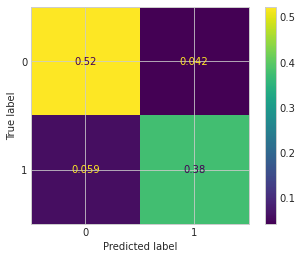

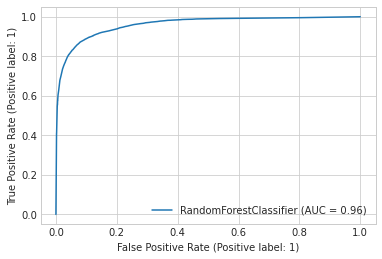

In [69]:
predict("RandomForestClassifier", RandomForestClassifier(), X_train_scaled_best_features, X_test_scaled_best_features, y_train, y_test, results_df_best_features_Wrapper_Mtd)

['GradientBoostingClassifier', 0.8922851863258392, 0.8948197572050783, 0.8530788938952204, 0.8734509271822705, 0.8878207459856126, 5.85965]
Plotting Confusion Matrix and ROC curve


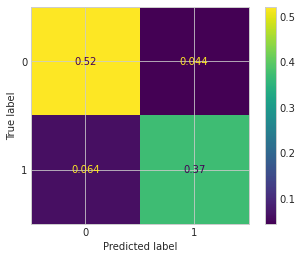

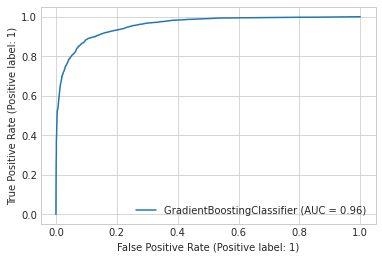

In [70]:
predict("GradientBoostingClassifier", GradientBoostingClassifier(), X_train_scaled_best_features, X_test_scaled_best_features, y_train, y_test, results_df_best_features_Wrapper_Mtd)

[09:37:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
['XGBClassifier', 0.9012550046196489, 0.9011180351906158, 0.8687163176959095, 0.8846205748729252, 0.8975498078893684, 25.10084]
Plotting Confusion Matrix and ROC curve


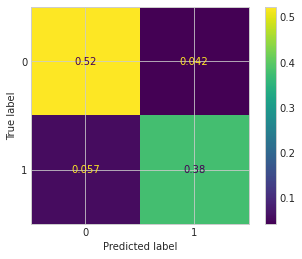

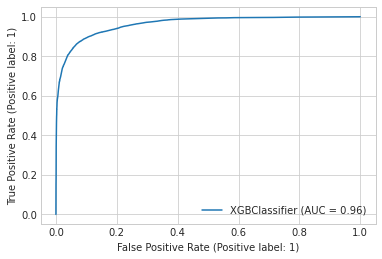

In [71]:
predict("XGBClassifier", XGBClassifier(), X_train_scaled_best_features, X_test_scaled_best_features, y_train, y_test, results_df_best_features_Wrapper_Mtd)

[09:38:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
['XGBRFClassifier', 0.8885124730520481, 0.8954088817951366, 0.8425655976676385, 0.8681838871187982, 0.8832804791231008, 18.9675]
Plotting Confusion Matrix and ROC curve


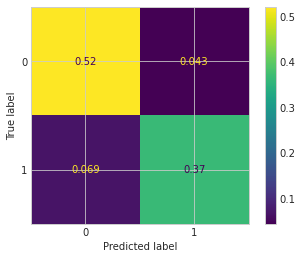

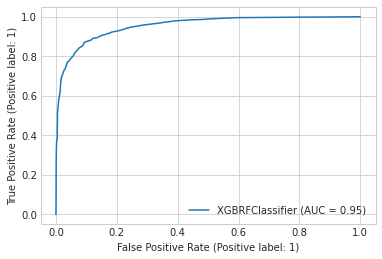

In [72]:
predict("XGBRFClassifier", XGBRFClassifier(), X_train_scaled_best_features, X_test_scaled_best_features, y_train, y_test, results_df_best_features_Wrapper_Mtd)

['AdaBoostClassifier', 0.8658376963350786, 0.847128677773839, 0.8445092322643343, 0.8458169269565987, 0.8634090133485144, 2.26044]
Plotting Confusion Matrix and ROC curve


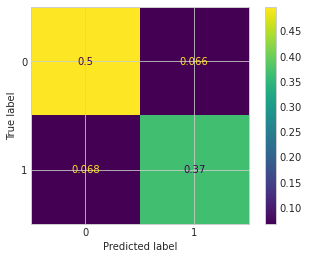

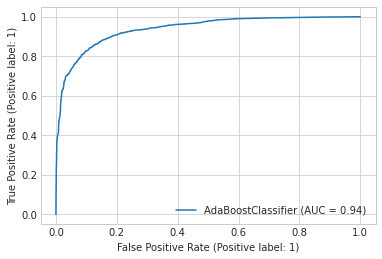

In [73]:
predict("AdaBoostClassifier", AdaBoostClassifier(), X_train_scaled_best_features, X_test_scaled_best_features, y_train, y_test, results_df_best_features_Wrapper_Mtd)

Learning rate set to 0.074823
0:	learn: 0.6185874	total: 22.2ms	remaining: 22.2s
1:	learn: 0.5464974	total: 45.7ms	remaining: 22.8s
2:	learn: 0.4912397	total: 68.2ms	remaining: 22.7s
3:	learn: 0.4513287	total: 91.3ms	remaining: 22.7s
4:	learn: 0.4230919	total: 114ms	remaining: 22.6s
5:	learn: 0.3989032	total: 136ms	remaining: 22.5s
6:	learn: 0.3797777	total: 159ms	remaining: 22.5s
7:	learn: 0.3620884	total: 183ms	remaining: 22.7s
8:	learn: 0.3482655	total: 207ms	remaining: 22.8s
9:	learn: 0.3363972	total: 231ms	remaining: 22.9s
10:	learn: 0.3263727	total: 254ms	remaining: 22.9s
11:	learn: 0.3187199	total: 286ms	remaining: 23.6s
12:	learn: 0.3126304	total: 308ms	remaining: 23.4s
13:	learn: 0.3053102	total: 331ms	remaining: 23.3s
14:	learn: 0.3000566	total: 353ms	remaining: 23.2s
15:	learn: 0.2962632	total: 377ms	remaining: 23.2s
16:	learn: 0.2922810	total: 401ms	remaining: 23.2s
17:	learn: 0.2877020	total: 424ms	remaining: 23.1s
18:	learn: 0.2850183	total: 447ms	remaining: 23.1s
19:	lea

166:	learn: 0.2346095	total: 4.04s	remaining: 20.2s
167:	learn: 0.2345427	total: 4.06s	remaining: 20.1s
168:	learn: 0.2345124	total: 4.09s	remaining: 20.1s
169:	learn: 0.2344260	total: 4.11s	remaining: 20.1s
170:	learn: 0.2343930	total: 4.14s	remaining: 20.1s
171:	learn: 0.2343633	total: 4.16s	remaining: 20s
172:	learn: 0.2342905	total: 4.18s	remaining: 20s
173:	learn: 0.2341653	total: 4.21s	remaining: 20s
174:	learn: 0.2341054	total: 4.24s	remaining: 20s
175:	learn: 0.2340674	total: 4.26s	remaining: 20s
176:	learn: 0.2340168	total: 4.29s	remaining: 19.9s
177:	learn: 0.2340002	total: 4.31s	remaining: 19.9s
178:	learn: 0.2339863	total: 4.34s	remaining: 19.9s
179:	learn: 0.2339422	total: 4.36s	remaining: 19.9s
180:	learn: 0.2339138	total: 4.39s	remaining: 19.8s
181:	learn: 0.2338725	total: 4.41s	remaining: 19.8s
182:	learn: 0.2338486	total: 4.43s	remaining: 19.8s
183:	learn: 0.2338130	total: 4.46s	remaining: 19.8s
184:	learn: 0.2337765	total: 4.48s	remaining: 19.7s
185:	learn: 0.2337443	

325:	learn: 0.2310141	total: 7.88s	remaining: 16.3s
326:	learn: 0.2310059	total: 7.91s	remaining: 16.3s
327:	learn: 0.2310005	total: 7.93s	remaining: 16.3s
328:	learn: 0.2309815	total: 7.96s	remaining: 16.2s
329:	learn: 0.2309519	total: 7.98s	remaining: 16.2s
330:	learn: 0.2309324	total: 8s	remaining: 16.2s
331:	learn: 0.2309257	total: 8.02s	remaining: 16.1s
332:	learn: 0.2309180	total: 8.05s	remaining: 16.1s
333:	learn: 0.2308958	total: 8.07s	remaining: 16.1s
334:	learn: 0.2308745	total: 8.1s	remaining: 16.1s
335:	learn: 0.2308649	total: 8.12s	remaining: 16.1s
336:	learn: 0.2308463	total: 8.15s	remaining: 16s
337:	learn: 0.2308342	total: 8.17s	remaining: 16s
338:	learn: 0.2308130	total: 8.19s	remaining: 16s
339:	learn: 0.2307840	total: 8.22s	remaining: 15.9s
340:	learn: 0.2307679	total: 8.24s	remaining: 15.9s
341:	learn: 0.2307513	total: 8.26s	remaining: 15.9s
342:	learn: 0.2307346	total: 8.29s	remaining: 15.9s
343:	learn: 0.2307312	total: 8.31s	remaining: 15.9s
344:	learn: 0.2307163	

492:	learn: 0.2289908	total: 12.2s	remaining: 12.5s
493:	learn: 0.2289863	total: 12.2s	remaining: 12.5s
494:	learn: 0.2289683	total: 12.2s	remaining: 12.5s
495:	learn: 0.2289481	total: 12.2s	remaining: 12.4s
496:	learn: 0.2289365	total: 12.3s	remaining: 12.4s
497:	learn: 0.2289301	total: 12.3s	remaining: 12.4s
498:	learn: 0.2289140	total: 12.3s	remaining: 12.4s
499:	learn: 0.2289055	total: 12.3s	remaining: 12.3s
500:	learn: 0.2289001	total: 12.4s	remaining: 12.3s
501:	learn: 0.2288986	total: 12.4s	remaining: 12.3s
502:	learn: 0.2288856	total: 12.4s	remaining: 12.3s
503:	learn: 0.2288756	total: 12.4s	remaining: 12.2s
504:	learn: 0.2288705	total: 12.5s	remaining: 12.2s
505:	learn: 0.2288586	total: 12.5s	remaining: 12.2s
506:	learn: 0.2288523	total: 12.5s	remaining: 12.2s
507:	learn: 0.2288479	total: 12.5s	remaining: 12.1s
508:	learn: 0.2288415	total: 12.6s	remaining: 12.1s
509:	learn: 0.2288406	total: 12.6s	remaining: 12.1s
510:	learn: 0.2288319	total: 12.6s	remaining: 12.1s
511:	learn: 

654:	learn: 0.2281039	total: 17.8s	remaining: 9.36s
655:	learn: 0.2281020	total: 17.8s	remaining: 9.33s
656:	learn: 0.2280977	total: 17.8s	remaining: 9.31s
657:	learn: 0.2280893	total: 17.9s	remaining: 9.29s
658:	learn: 0.2280805	total: 17.9s	remaining: 9.26s
659:	learn: 0.2280763	total: 17.9s	remaining: 9.23s
660:	learn: 0.2280723	total: 17.9s	remaining: 9.2s
661:	learn: 0.2280687	total: 18s	remaining: 9.18s
662:	learn: 0.2280644	total: 18s	remaining: 9.15s
663:	learn: 0.2280567	total: 18s	remaining: 9.13s
664:	learn: 0.2280572	total: 18.1s	remaining: 9.1s
665:	learn: 0.2280552	total: 18.1s	remaining: 9.07s
666:	learn: 0.2280497	total: 18.1s	remaining: 9.05s
667:	learn: 0.2280466	total: 18.2s	remaining: 9.02s
668:	learn: 0.2280448	total: 18.2s	remaining: 9s
669:	learn: 0.2280372	total: 18.2s	remaining: 8.98s
670:	learn: 0.2280361	total: 18.3s	remaining: 8.95s
671:	learn: 0.2280307	total: 18.3s	remaining: 8.93s
672:	learn: 0.2280234	total: 18.3s	remaining: 8.9s
673:	learn: 0.2280174	to

814:	learn: 0.2273454	total: 22.4s	remaining: 5.08s
815:	learn: 0.2273364	total: 22.4s	remaining: 5.06s
816:	learn: 0.2273306	total: 22.5s	remaining: 5.03s
817:	learn: 0.2273239	total: 22.5s	remaining: 5s
818:	learn: 0.2273147	total: 22.5s	remaining: 4.97s
819:	learn: 0.2273145	total: 22.5s	remaining: 4.95s
820:	learn: 0.2273113	total: 22.6s	remaining: 4.92s
821:	learn: 0.2273012	total: 22.6s	remaining: 4.89s
822:	learn: 0.2273013	total: 22.6s	remaining: 4.87s
823:	learn: 0.2272964	total: 22.7s	remaining: 4.84s
824:	learn: 0.2272924	total: 22.7s	remaining: 4.81s
825:	learn: 0.2272855	total: 22.7s	remaining: 4.78s
826:	learn: 0.2272853	total: 22.7s	remaining: 4.76s
827:	learn: 0.2272829	total: 22.8s	remaining: 4.73s
828:	learn: 0.2272816	total: 22.8s	remaining: 4.7s
829:	learn: 0.2272723	total: 22.8s	remaining: 4.67s
830:	learn: 0.2272691	total: 22.9s	remaining: 4.65s
831:	learn: 0.2272648	total: 22.9s	remaining: 4.62s
832:	learn: 0.2272581	total: 22.9s	remaining: 4.59s
833:	learn: 0.22

980:	learn: 0.2266632	total: 27s	remaining: 524ms
981:	learn: 0.2266612	total: 27.1s	remaining: 496ms
982:	learn: 0.2266567	total: 27.1s	remaining: 468ms
983:	learn: 0.2266463	total: 27.1s	remaining: 441ms
984:	learn: 0.2266379	total: 27.1s	remaining: 413ms
985:	learn: 0.2266333	total: 27.2s	remaining: 386ms
986:	learn: 0.2266276	total: 27.2s	remaining: 358ms
987:	learn: 0.2266242	total: 27.2s	remaining: 330ms
988:	learn: 0.2266239	total: 27.2s	remaining: 303ms
989:	learn: 0.2266192	total: 27.3s	remaining: 275ms
990:	learn: 0.2266188	total: 27.3s	remaining: 248ms
991:	learn: 0.2266140	total: 27.3s	remaining: 220ms
992:	learn: 0.2266098	total: 27.3s	remaining: 193ms
993:	learn: 0.2266099	total: 27.4s	remaining: 165ms
994:	learn: 0.2266089	total: 27.4s	remaining: 138ms
995:	learn: 0.2266066	total: 27.4s	remaining: 110ms
996:	learn: 0.2266021	total: 27.4s	remaining: 82.5ms
997:	learn: 0.2266000	total: 27.5s	remaining: 55ms
998:	learn: 0.2265958	total: 27.5s	remaining: 27.5ms
999:	learn: 0

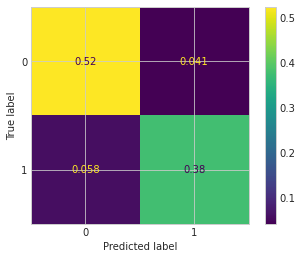

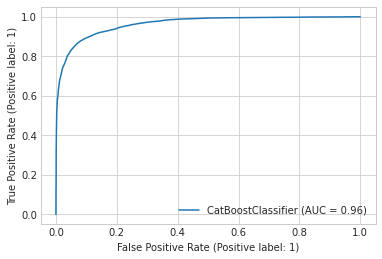

In [74]:
predict("CatBoostClassifier", CatBoostClassifier(), X_train_scaled_best_features, X_test_scaled_best_features, y_train, y_test, results_df_best_features_Wrapper_Mtd)

In [75]:
# Sort and ignore index
results_df_best_features_Wrapper_Mtd= results_df_best_features_Wrapper_Mtd.sort_values('ROC-AUC score', ascending=False, ignore_index=True)
results_df_best_features_Wrapper_Mtd.head(20)

,Algorithm,Accuracy,Precision,Recall,F1 Score,ROC-AUC score,Execution Time (sec)
0,XGBClassifier,0.901255,0.901118,0.868716,0.884621,0.897550,25.10084
1,CatBoostClassifier,0.901370,0.902695,0.867126,0.884553,0.897471,28.14564
2,RandomForestClassifier,0.898714,0.899853,0.863681,0.881396,0.894725,5.42345
3,DecisionTreeClassifier,0.898445,0.901415,0.861118,0.880806,0.894194,0.19408
4,GradientBoostingClassifier,0.892285,0.894820,0.853079,0.873451,0.887821,5.85965
5,XGBRFClassifier,0.888512,0.895409,0.842566,0.868184,0.883280,18.96750
6,AdaBoostClassifier,0.865838,0.847129,0.844509,0.845817,0.863409,2.26044
7,SGDClassifier,0.836734,0.809678,0.817475,0.813558,0.834541,0.31061
8,Logistic Regression,0.835002,0.813274,0.806520,0.809883,0.831758,3.31862
9,Linear SVC,0.832692,0.804684,0.813499,0.809068,0.830506,2.52061


### Scoring/Metrics
    Evaluation Metric: ROC_AUC Score

In [76]:
# Creating a Dataframe consists of ROC score and Accuracy obtained from different dataframes
df3 = results_df_top10_features_SelectKBest[['Algorithm', 'Accuracy', 'ROC-AUC score']].merge(results_df_top15_features_SelectKBest[['Algorithm', 'Accuracy',  'ROC-AUC score']], on='Algorithm', suffixes=('_X10', '_X15'))
df4 = results_df_all_features[['Algorithm', 'Accuracy', 'ROC-AUC score']].merge(results_df_best_features_Wrapper_Mtd[['Algorithm', 'Accuracy',  'ROC-AUC score']], on='Algorithm', suffixes=('_X_All', '_X_Best6'))
final_results_df = df3.merge(df4, on='Algorithm')
final_results_df = final_results_df.sort_values(by=['ROC-AUC score_X_All', 'Accuracy_X_All'], ascending=False, ignore_index=True)
final_results_df.head(10)

,Algorithm,Accuracy_X10,ROC-AUC score_X10,Accuracy_X15,ROC-AUC score_X15,Accuracy_X_All,ROC-AUC score_X_All,Accuracy_X_Best6,ROC-AUC score_X_Best6
0,CatBoostClassifier,0.916346,0.912512,0.939598,0.936577,0.943217,0.940236,0.901370,0.897471
1,XGBClassifier,0.914883,0.910894,0.938713,0.935621,0.941792,0.938904,0.901255,0.897550
2,RandomForestClassifier,0.906067,0.902337,0.936210,0.933142,0.940868,0.937914,0.898714,0.894725
3,GradientBoostingClassifier,0.899099,0.894975,0.921504,0.918471,0.921235,0.918051,0.892285,0.887821
4,DecisionTreeClassifier,0.882969,0.880984,0.913266,0.912016,0.915460,0.914142,0.898445,0.894194
5,XGBRFClassifier,0.899600,0.895510,0.911418,0.908890,0.910995,0.908384,0.888512,0.883280
6,AdaBoostClassifier,0.871689,0.869278,0.892670,0.890546,0.895442,0.893274,0.865838,0.863409
7,Logistic Regression,0.851093,0.845947,0.866069,0.860938,0.867917,0.862605,0.835002,0.831758
8,Linear SVC,0.850092,0.844970,0.865568,0.859951,0.867108,0.861265,0.832692,0.830506
9,SGDClassifier,0.853942,0.841218,0.869995,0.860202,0.867378,0.860166,0.836734,0.834541


In [77]:
# Creating a Dataframe consists of ROC score and Accuracy obtained from different dataframes and storing it a csv file
df3_all = results_df_top10_features_SelectKBest.merge(results_df_top15_features_SelectKBest, on='Algorithm', suffixes=('_X10', '_X15'))
df4_all = results_df_all_features.merge(results_df_best_features_Wrapper_Mtd, on='Algorithm', suffixes=('_X_All', '_X_Best6'))

final_results_df_all = df3_all.merge(df4_all, on='Algorithm')
final_results_df_all = final_results_df_all.sort_values(by=['ROC-AUC score_X_All', 'Accuracy_X_All'], ascending=False, ignore_index=True)

final_all_scores = final_results_df_all.to_csv('Scores.csv', index=False)

In [78]:
final_results_df_all.head(10)

,Algorithm,Accuracy_X10,Precision_X10,Recall_X10,F1 Score_X10,ROC-AUC score_X10,Execution Time (sec)_X10,Accuracy_X15,Precision_X15,Recall_X15,...,Recall_X_All,F1 Score_X_All,ROC-AUC score_X_All,Execution Time (sec)_X_All,Accuracy_X_Best6,Precision_X_Best6,Recall_X_Best6,F1 Score_X_Best6,ROC-AUC score_X_Best6,Execution Time (sec)_X_Best6
0,CatBoostClassifier,0.916346,0.922019,0.882675,0.901918,0.912512,28.63186,0.939598,0.946429,0.913067,...,0.917042,0.933663,0.940236,37.23682,0.901370,0.902695,0.867126,0.884553,0.897471,28.14564
1,XGBClassifier,0.914883,0.921277,0.879848,0.900086,0.910894,27.31163,0.938713,0.945825,0.911565,...,0.916424,0.932069,0.938904,255.89364,0.901255,0.901118,0.868716,0.884621,0.897550,25.10084
2,RandomForestClassifier,0.906067,0.907630,0.873310,0.890140,0.902337,11.07003,0.936210,0.942318,0.909268,...,0.914922,0.930960,0.937914,14.60112,0.898714,0.899853,0.863681,0.881396,0.894725,5.42345
3,GradientBoostingClassifier,0.899099,0.901347,0.862885,0.881697,0.894975,9.61167,0.921504,0.922664,0.894867,...,0.893277,0.908119,0.918051,17.22614,0.892285,0.894820,0.853079,0.873451,0.887821,5.85965
4,DecisionTreeClassifier,0.882969,0.865842,0.865536,0.865689,0.880984,0.44696,0.913266,0.899032,0.902288,...,0.903878,0.903081,0.914142,0.81819,0.898445,0.901415,0.861118,0.880806,0.894194,0.19408
5,XGBRFClassifier,0.899600,0.901762,0.863681,0.882310,0.895510,25.02650,0.911418,0.905778,0.889213,...,0.888064,0.896859,0.908384,94.56185,0.888512,0.895409,0.842566,0.868184,0.883280,18.96750
6,AdaBoostClassifier,0.871689,0.854366,0.850517,0.852437,0.869278,3.15615,0.892670,0.878987,0.874017,...,0.876403,0.879589,0.893274,5.56668,0.865838,0.847129,0.844509,0.845817,0.863409,2.26044
7,Logistic Regression,0.851093,0.845177,0.805902,0.825072,0.845947,5.71607,0.866069,0.864787,0.821009,...,0.821274,0.844208,0.862605,4.82589,0.835002,0.813274,0.806520,0.809883,0.831758,3.31862
8,Linear SVC,0.850092,0.843718,0.805106,0.823960,0.844970,3.60866,0.865568,0.867430,0.816238,...,0.815796,0.842518,0.861265,8.13685,0.832692,0.804684,0.813499,0.809068,0.830506,2.52061
9,SGDClassifier,0.853942,0.905573,0.742203,0.815789,0.841218,0.38626,0.869995,0.904956,0.783992,...,0.804046,0.840856,0.860166,0.51236,0.836734,0.809678,0.817475,0.813558,0.834541,0.31061


### Conclusions:
    1. From the above analysis, we have found that the CatBoostAlgorithm and XGBClassifer with default parameters works best with this dataset.
    2. Really Important Features: Type of Travel, Ease of Online booking, Online boarding, Seat comfort, Inflight entertainment
    3. Important Features: Class, Flight Distance, On-board service, Leg room service, Cleanliness, Checkin service, Inflight service, Baggage handling
    Hence, to retain the loyal customers, airlines will have to improve the services of these features. Improvement in these services can encourage the disloyal customer to be loyal.

### Future Steps:
    1. With high computational power and running time, Hyperparameter tuning and Cross-validations can be applied to generate better results.
    2. Variable importances can be visualized from each of the algorithm after hypertuning them.
    3. Outlier Analysis can be perfected based on business needs.

### Hyper parameter tuning

In [91]:
#Creating a Result Dataframe 
results_df_hyper_param = pd.DataFrame(columns = ['Algorithm', 'Accuracy', 'Precision','Recall', 'F1 Score', 'ROC-AUC score', 'Execution Time (sec)'])
results_df_hyper_param

,Algorithm,Accuracy,Precision,Recall,F1 Score,ROC-AUC score,Execution Time (sec)


In [81]:
# Applying Crossvalidation and HyperParameter Tunings
# Parameter grid for RFC 
rfc_param_grid = { 
    'n_estimators': [300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
     'max_depth' : [3, 4, 5]
}

In [88]:
# Use the random grid to search for best hyperparameters
rf_cls = RandomForestClassifier()
rf_rand = RandomizedSearchCV(estimator = rf_cls, param_distributions = rfc_param_grid,scoring='roc_auc', n_iter = 10, cv = 5, verbose=2, random_state=40, n_jobs = 1)
rf_rand.fit(X_train_scaled,y_train)
# Printing metrics for RFC with RandomizedSearchCV
print(rf_rand.best_params_)
print(rf_rand.best_score_)
print(rf_rand.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...max_depth=3, max_features=auto, n_estimators=500; total time=  14.5s
[CV] END ...max_depth=3, max_features=auto, n_estimators=500; total time=  15.1s
[CV] END ...max_depth=3, max_features=auto, n_estimators=500; total time=  15.7s
[CV] END ...max_depth=3, max_features=auto, n_estimators=500; total time=  17.4s
[CV] END ...max_depth=3, max_features=auto, n_estimators=500; total time=  15.8s
[CV] END ...max_depth=4, max_features=log2, n_estimators=400; total time=  14.7s
[CV] END ...max_depth=4, max_features=log2, n_estimators=400; total time=  15.2s
[CV] END ...max_depth=4, max_features=log2, n_estimators=400; total time=  14.3s
[CV] END ...max_depth=4, max_features=log2, n_estimators=400; total time=  14.9s
[CV] END ...max_depth=4, max_features=log2, n_estimators=400; total time=  14.2s
[CV] END ...max_depth=5, max_features=auto, n_estimators=400; total time=  16.8s
[CV] END ...max_depth=5, max_features=auto, n_es

['RF - RandSrchCV(est-300, auto, dep-5)', 0.8999846011703111, 0.9153252690732451, 0.8490149306475837, 0.8809240077000642, 0.894180659019637, 15.88695]
Plotting Confusion Matrix and ROC curve


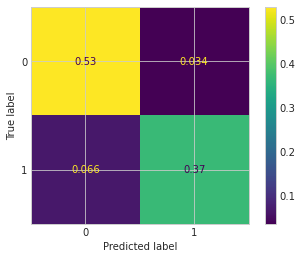

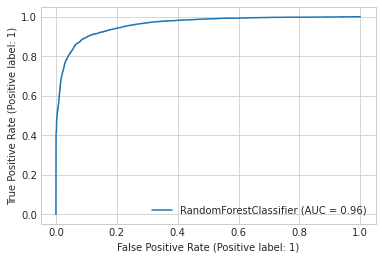

In [92]:
# Generating RFC model with the best params
# Best prarams are : 
#{'n_estimators': 500, 'max_features': 'auto', 'max_depth': 5}
predict("RF - RandSrchCV(est-300, auto, dep-5)", RandomForestClassifier(max_depth=5, max_features='sqrt', n_estimators=300),  
        X_train_scaled, X_test_scaled, y_train, y_test, results_df_hyper_param)

In [ ]:
### For the below cell, kernal kept getting dead. hence, commented it.
###Also, the conclusion and future steps are mentioned above the hyperparameter tuning topic.

#### Use the random grid to search for best hyperparameters
clf_xgb = XGBClassifier(objective = 'binary:logistic')
param_dist = {
    'n_estimators': [400, 500],
    #'colsample_bytree': [0.7, 0.8],
    'max_depth': [10],
    'reg_alpha': [1.1],
    'reg_lambda': [1.1],
    'subsample': [0.7,0.8]
}
clf_xgb_rand = RandomizedSearchCV(estimator = clf_xgb, param_distributions = param_dist, scoring='roc_auc', n_iter = 5, cv = 5, verbose=2, random_state=40, n_jobs = 1)
clf_xgb_rand.fit(X_train_scaled,y_train)
##### Printing metrics for XGB with RandomizedSearchCV
print(clf_xgb_rand.best_params_)
print(clf_xgb_rand.best_score_)
print(clf_xgb_rand.best_estimator_)

####
Best prarams are : 
#{'n_estimators': 200, 'max_features': 'log2', 'max_depth': 5}
predict("XGB - RandSrchCV(5, log2, 200)", XGBClassifier(objective = 'binary:logistic', colsample_bytree= 0.7, max_depth= 15, n_estimators= 400, reg_alpha= 1.1, reg_lambda= 1.1, subsample= 0.7), 
      X_train_scaled, X_test_scaled, y_train, y_test, results_df_hyper_param)

In [ ]:
results_df_hyper_param.head()